 ### Tasks to be Performed:
 1. Preprocess and remove the noise from the data
 2. Feature engineer data according to the business requirements
 3. Model and Evaluate various strategies that will be used to find actionable insights

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings(action="ignore")

In [38]:
# Set display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [39]:
df = pd.read_csv('data.csv',na_values='?',skipinitialspace=True)

In [40]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                              0.371         
1          1                                              0.464         
2          1                                              0.426         
3          1                                              0.400         
4          1                                              0.465         

   ROA(A) before interest and % after tax  \
0                                   0.424   
1                                   0.538   
2                                   0.499   
3                                   0.451   
4                                   0.538   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                              0.406                   0.601   
1                                              0.517                   0.610   
2                                              0.472                   0.601   
3                                              0.458                   0.584   
4                                              0.522                   0.599   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                        0.601                  0.999   
1                        0.610                  0.999   
2                        0.601                  0.999   
3                        0.584                  0.999   
4                        0.599                  0.999   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                      0.797                        0.809   
1                      0.797                        0.809   
2                      0.796                        0.808   
3                      0.797                        0.809   
4                      0.797                        0.809   

   Non-industry income and expenditure/revenue  \
0                                        0.303   
1                                        0.304   
2                                        0.302   
3                                        0.303   
4                                        0.303   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                                 0.781                   0.000   
1                                 0.782                   0.000   
2                                 0.780                   0.000   
3                                 0.781                   0.000   
4                                 0.782          7890000000.000   

   Research and development expense rate  Cash flow rate  \
0                                  0.000           0.458   
1                                  0.000           0.462   
2                           25500000.000           0.459   
3                                  0.000           0.466   
4                                  0.000           0.463   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                                0.001         0.000                    0.148   
1                                0.001         0.000                    0.182   
2                                0.001         0.000                    0.178   
3                                0.000         0.000                    0.154   
4                                0.001         0.000                    0.168   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                    0.148                    0.148   
1                    0.182                    0.182   
2                    0.178                    0.194   
3                    0.154                    0.154   
4                    0.168                    0.168   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                    0.169                0.312   
1                                    0.209                0.318   
2                 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [43]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

# 1. Preprocess and remove the noise from the data

### Checking Duplicate data

In [45]:
df[df.duplicated()]

Empty DataFrame
Columns: [Bankrupt?, ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax, ROA(B) before interest and depreciation after tax, Operating Gross Margin, Realized Sales Gross Margin, Operating Profit Rate, Pre-tax net Interest Rate, After-tax net Interest Rate, Non-industry income and expenditure/revenue, Continuous interest rate (after tax), Operating Expense Rate, Research and development expense rate, Cash flow rate, Interest-bearing debt interest rate, Tax rate (A), Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C), Persistent EPS in the Last Four Seasons, Cash Flow Per Share, Revenue Per Share (Yuan ¥), Operating Profit Per Share (Yuan ¥), Per Share Net profit before tax (Yuan ¥), Realized Sales Gross Profit Growth Rate, Operating Profit Growth Rate, After-tax Net Profit Growth Rate, Regular Net Profit Growth Rate, Continuous Net Profit Growth Rate, Total Asset Growth Rate, Net Value Growth Rate, Total Asset Return Growth Rate Ratio, Cash Reinvestment %, Current Ratio, Quick Ratio, Interest Expense Ratio, Total debt/Total net worth, Debt ratio %, Net worth/Assets, Long-term fund suitability ratio (A), Borrowing dependency, Contingent liabilities/Net worth, Operating profit/Paid-in capital, Net profit before tax/Paid-in capital, Inventory and accounts receivable/Net value, Total Asset Turnover, Accounts Receivable Turnover, Average Collection Days, Inventory Turnover Rate (times), Fixed Assets Turnover Frequency, Net Worth Turnover Rate (times), Revenue per person, Operating profit per person, Allocation rate per person, Working Capital to Total Assets, Quick Assets/Total Assets, Current Assets/Total Assets, Cash/Total Assets, Quick Assets/Current Liability, Cash/Current Liability, Current Liability to Assets, Operating Funds to Liability, Inventory/Working Capital, Inventory/Current Liability, Current Liabilities/Liability, Working Capital/Equity, Current Liabilities/Equity, Long-term Liability to Current Assets, Retained Earnings to Total Assets, Total income/Total expense, Total expense/Assets, Current Asset Turnover Rate, Quick Asset Turnover Rate, Working capitcal Turnover Rate, Cash Turnover Rate, Cash Flow to Sales, Fixed Assets to Assets, Current Liability to Liability, Current Liability to Equity, Equity to Long-term Liability, Cash Flow to Total Assets, Cash Flow to Liability, CFO to Assets, Cash Flow to Equity, Current Liability to Current Assets, Liability-Assets Flag, Net Income to Total Assets, Total assets to GNP price, No-credit Interval, Gross Profit to Sales, Net Income to Stockholder's Equity, Liability to Equity, Degree of Financial Leverage (DFL), Interest Coverage Ratio (Interest expense to EBIT), Net Income Flag, Equity to Liability]
Index: []

### Checking Null values

In [46]:
df.isna().sum().sum()

0

In [47]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count   6819.000                                           6819.000         
mean       0.032                                              0.505         
std        0.177                                              0.061         
min        0.000                                              0.000         
25%        0.000                                              0.477         
50%        0.000                                              0.503         
75%        0.000                                              0.536         
max        1.000                                              1.000         

       ROA(A) before interest and % after tax  \
count                                6819.000   
mean                                    0.559   
std                                     0.066   
min                                     0.000   
25%                                     0.536   
50%                                     0.560   
75%                                     0.589   
max                                     1.000   

       ROA(B) before interest and depreciation after tax  \
count                                           6819.000   
mean                                               0.554   
std                                                0.062   
min                                                0.000   
25%                                                0.527   
50%                                                0.552   
75%                                                0.584   
max                                                1.000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count                6819.000                     6819.000   
mean                    0.608                        0.608   
std                     0.017                        0.017   
min                     0.000                        0.000   
25%                     0.600                        0.600   
50%                     0.606                        0.606   
75%                     0.614                        0.614   
max                     1.000                        1.000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count               6819.000                   6819.000   
mean                   0.999                      0.797   
std                    0.013                      0.013   
min                    0.000                      0.000   
25%                    0.999                      0.797   
50%                    0.999                      0.797   
75%                    0.999                      0.798   
max                    1.000                      1.000   

       After-tax net Interest Rate  \
count                     6819.000   
mean                         0.809   
std                          0.014   
min                          0.000   
25%                          0.809   
50%                          0.809   
75%                          0.809   
max                          1.000   

       Non-industry income and expenditure/revenue  \
count                                     6819.000   
mean                                         0.304   
std                                          0.011   
min                                          0.000   
25%                                          0.303   
50%                                          0.304   
75%                                          0.304   
max                                          1.000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                              6819.000                6819.000   
mean                                  0.781          1995347312.803   
std                                   0.013          3237683890.522   
min                                   0.000                   0.000   
25%                                   0.782           

- The data is found to be already `min-max scaled` with 96 columns.

### Spliting training and testing data

In [48]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

In [49]:
X.shape, y.shape

((6819, 95), (6819,))

### Outliers Detection

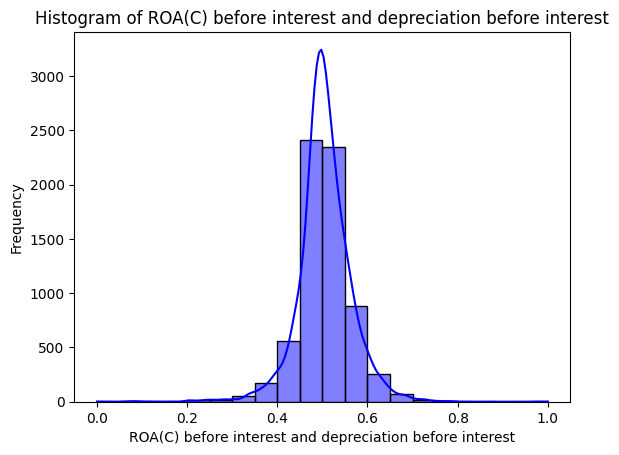

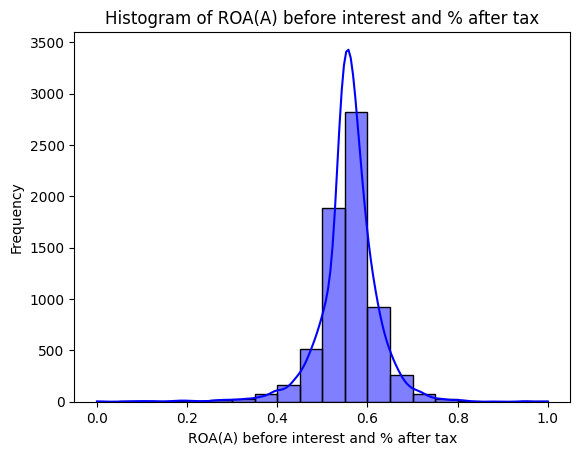

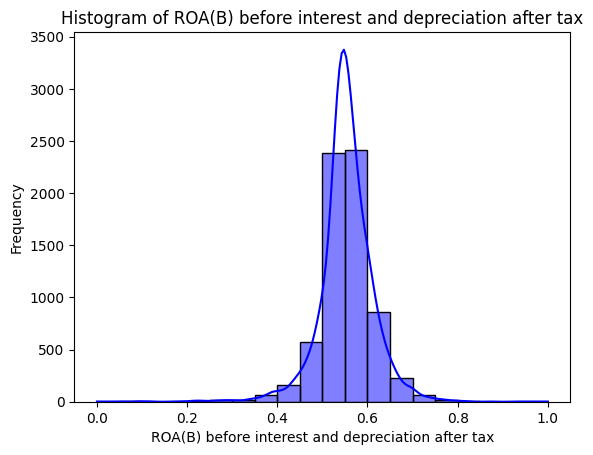

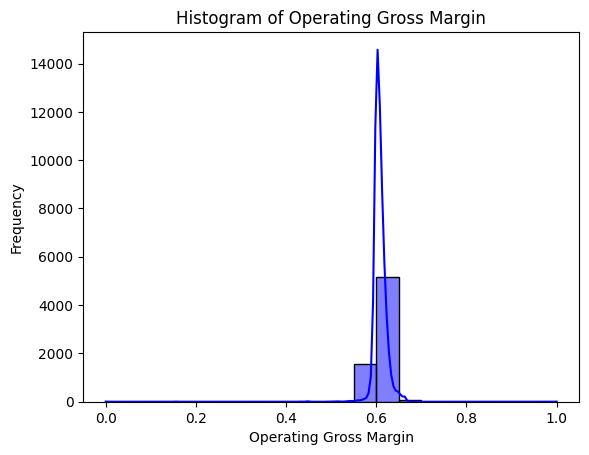

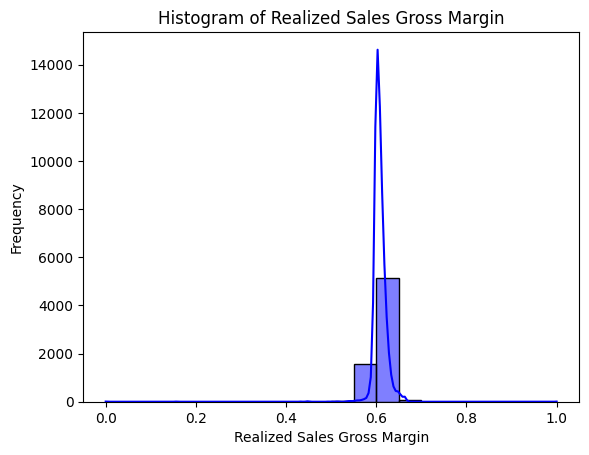

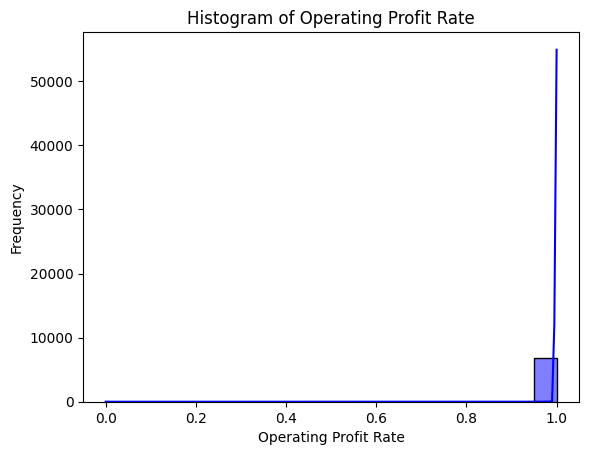

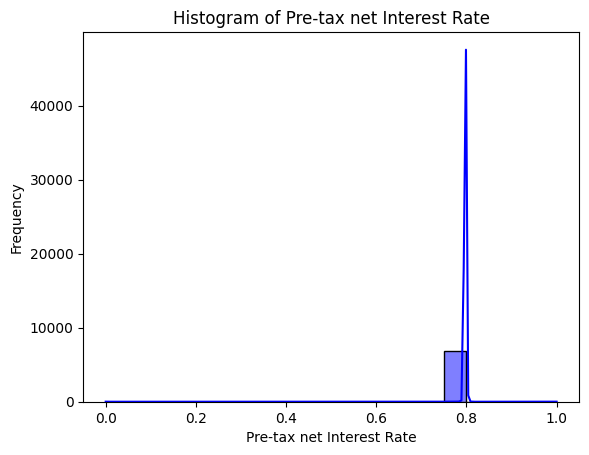

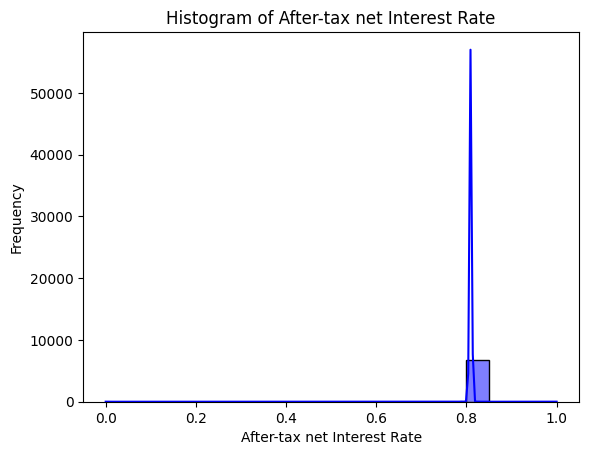

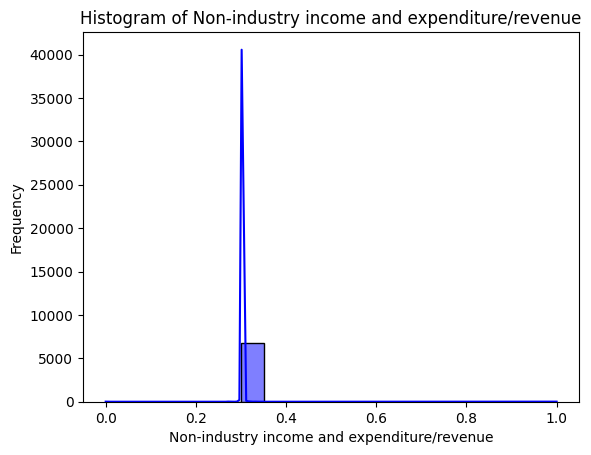

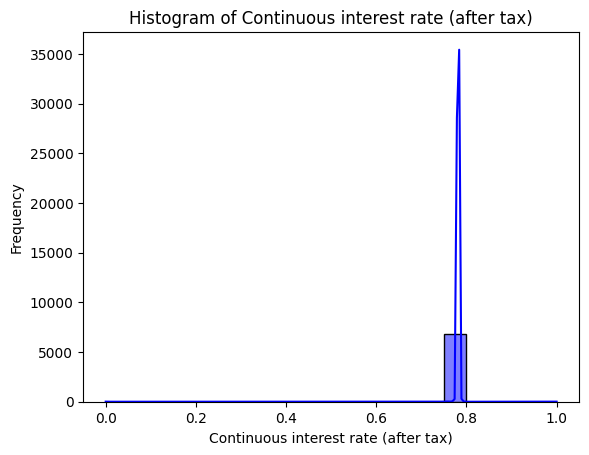

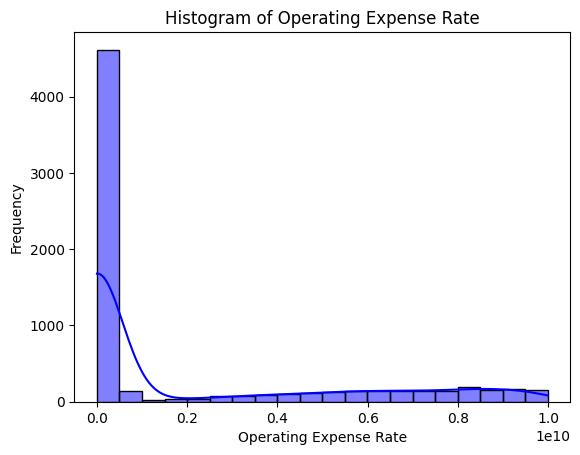

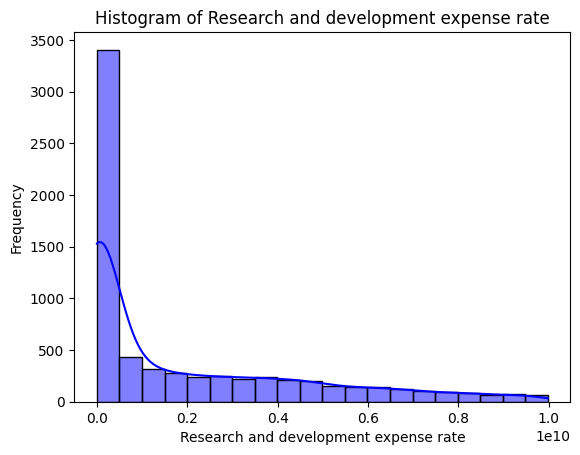

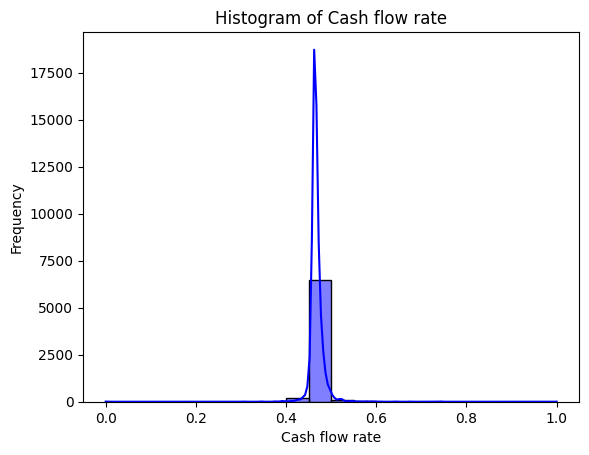

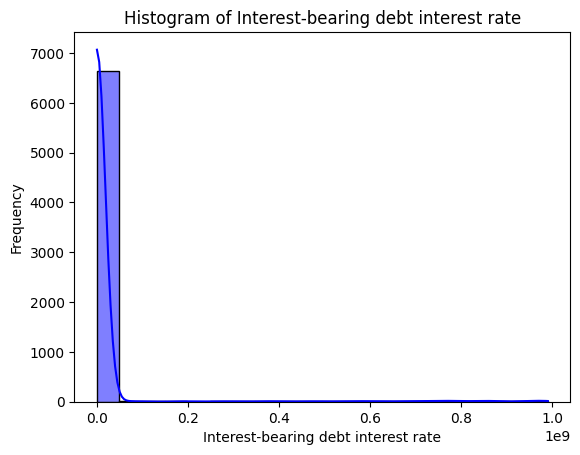

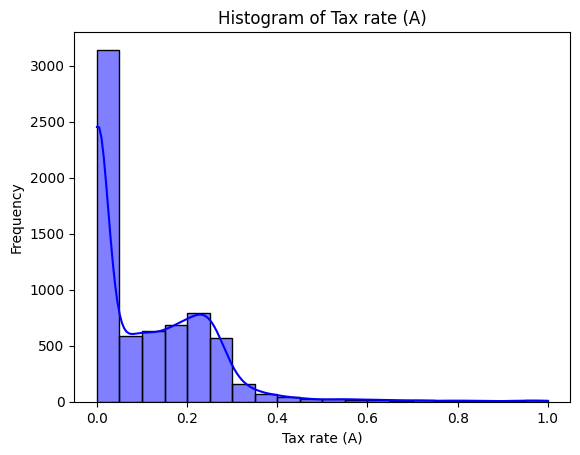

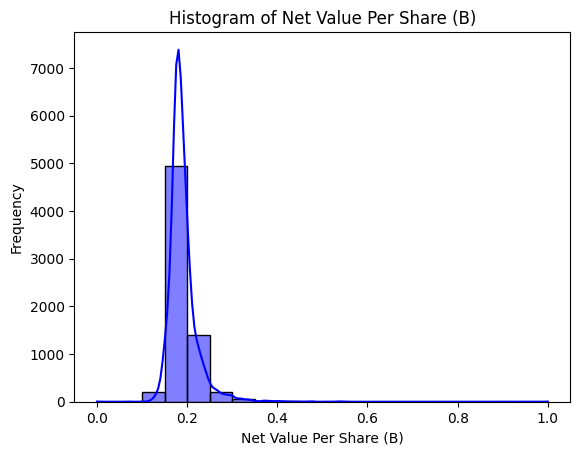

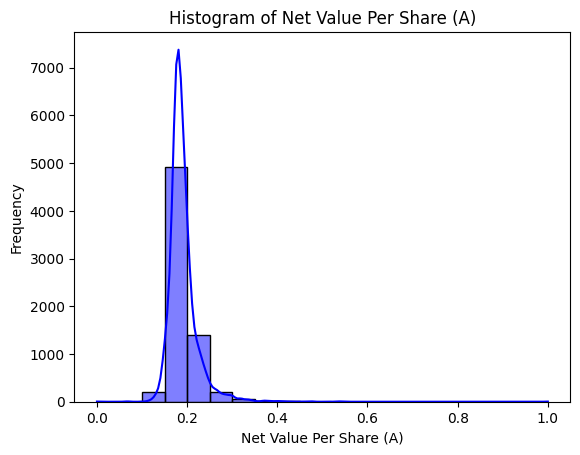

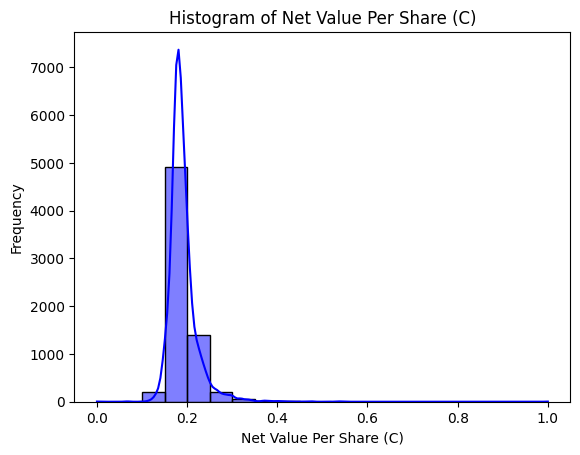

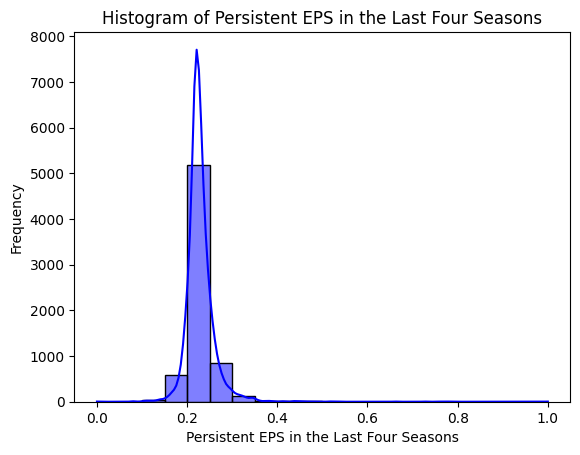

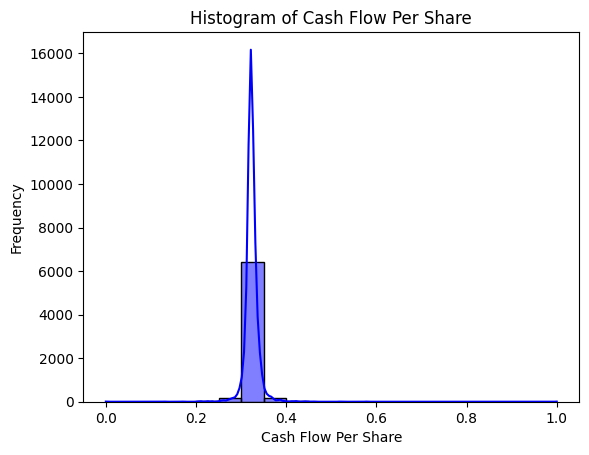

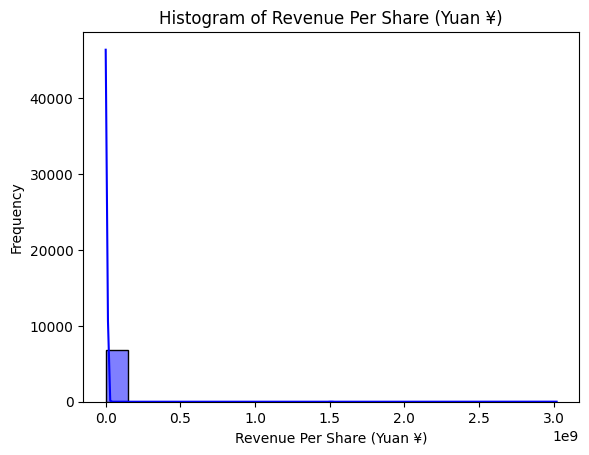

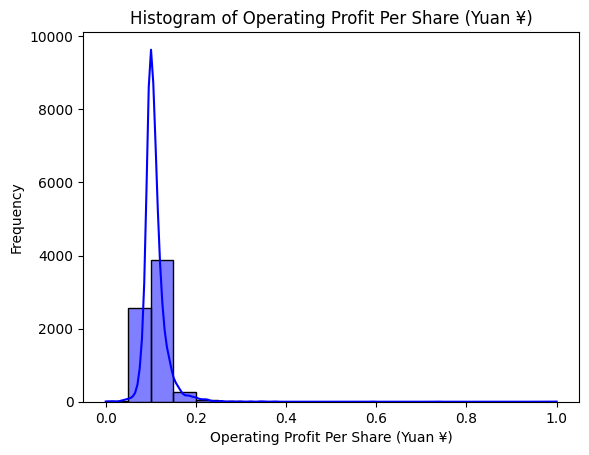

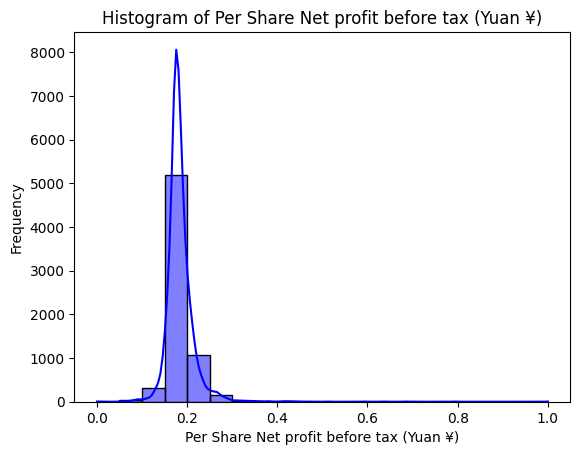

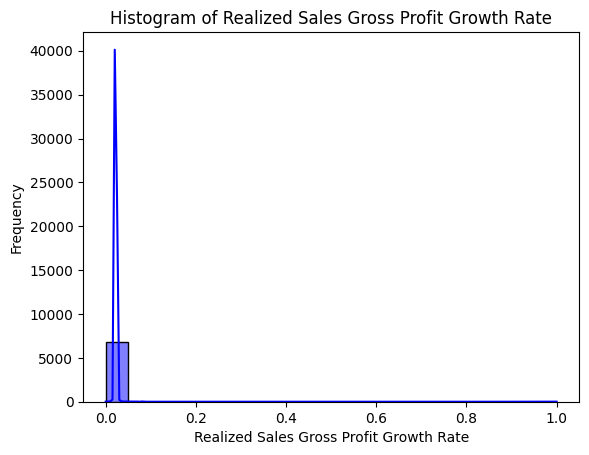

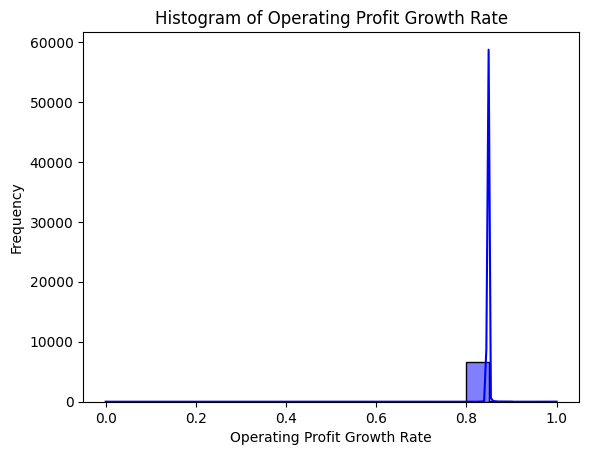

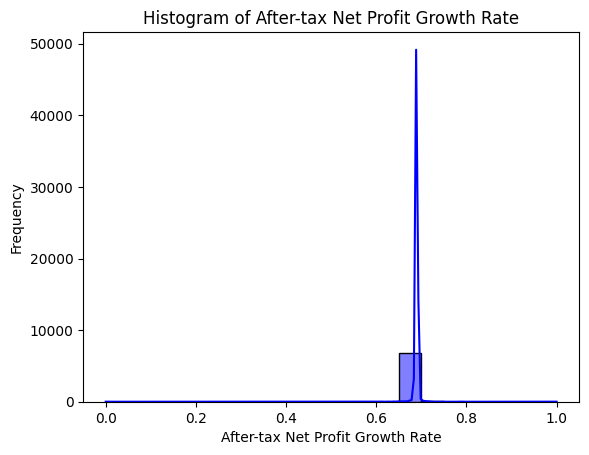

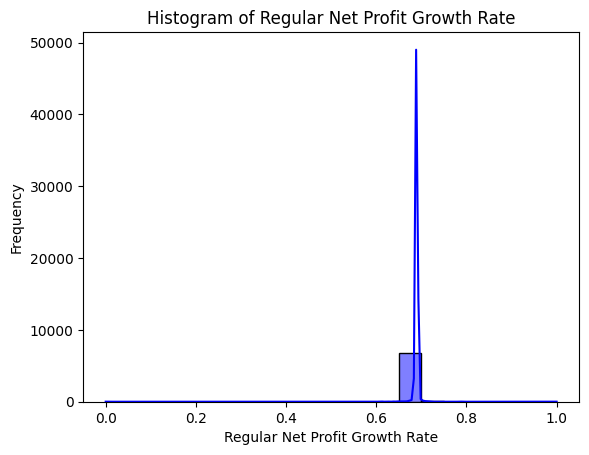

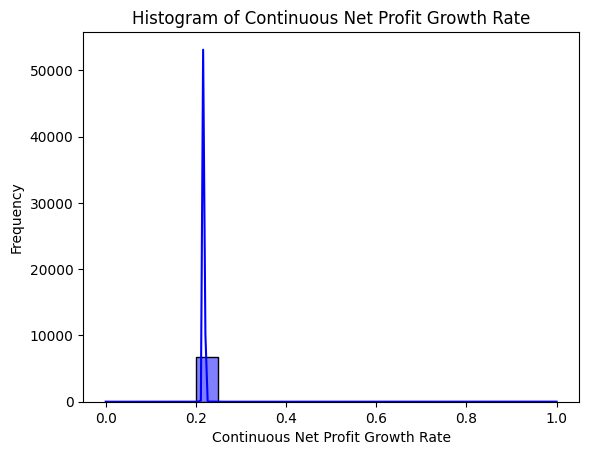

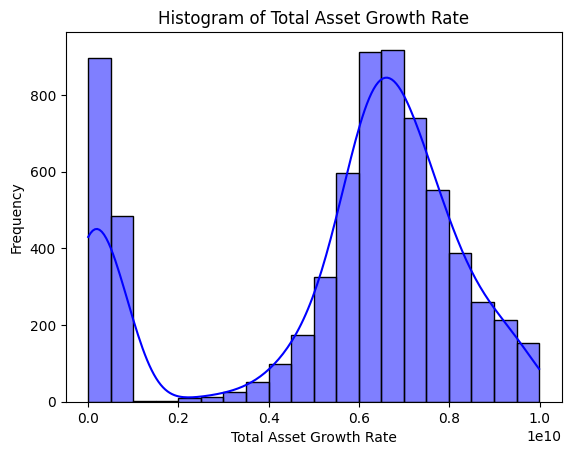

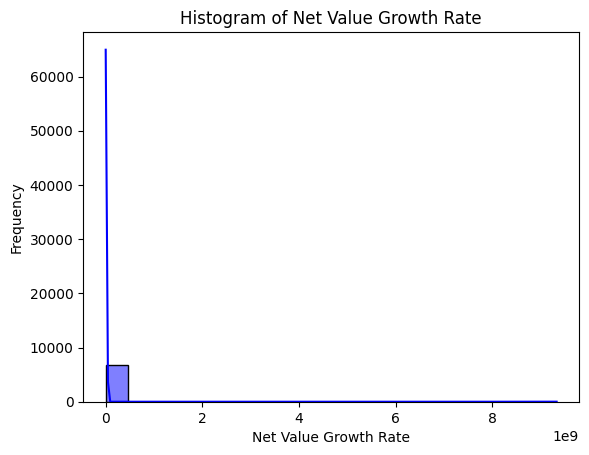

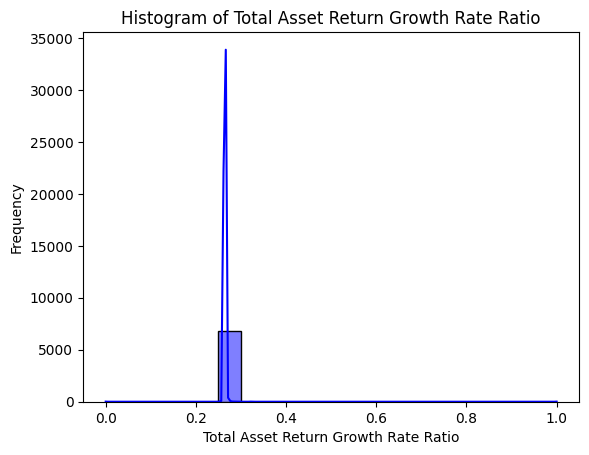

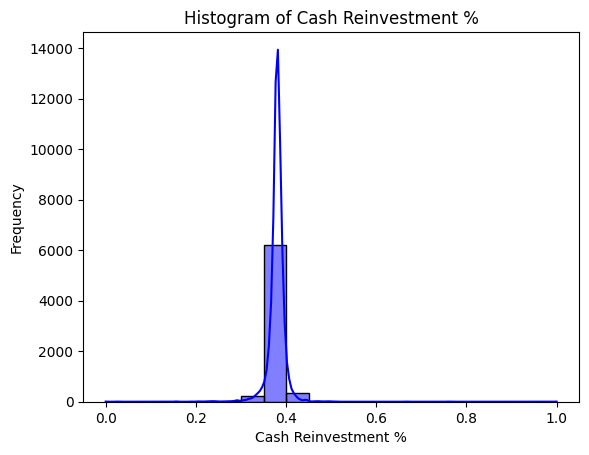

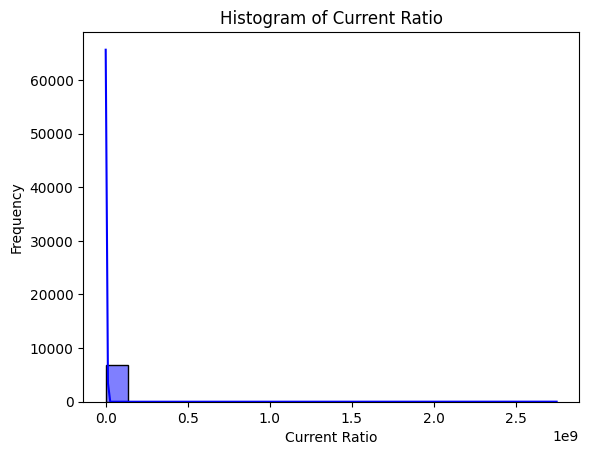

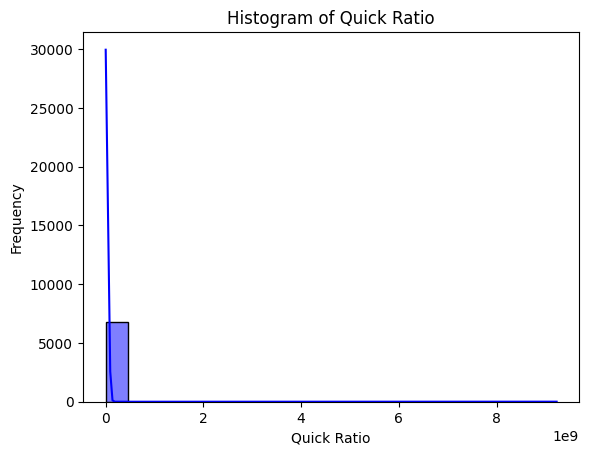

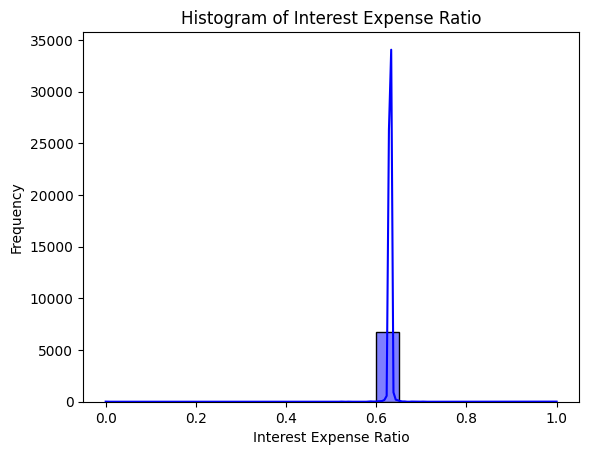

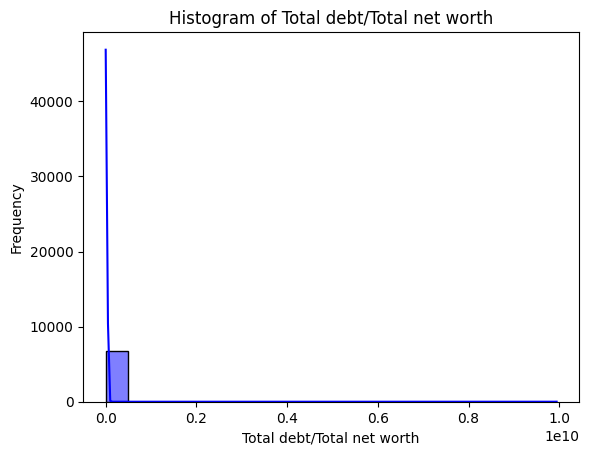

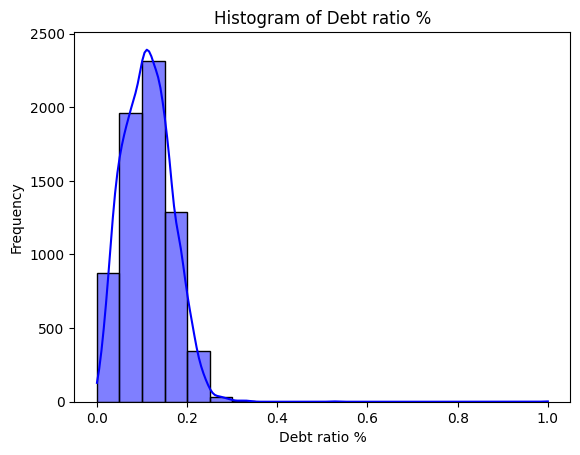

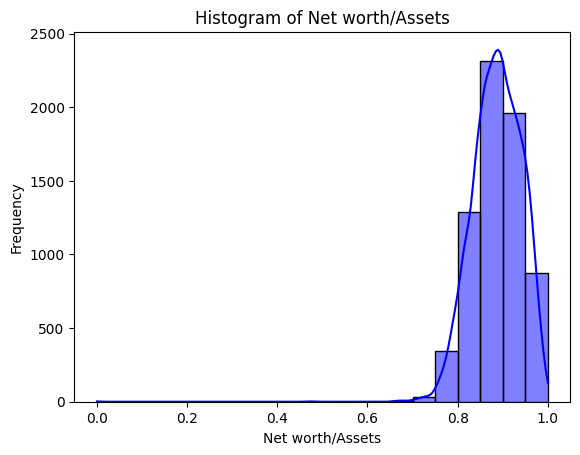

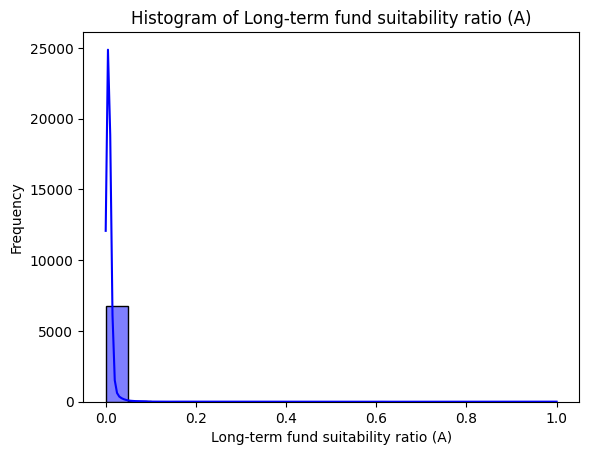

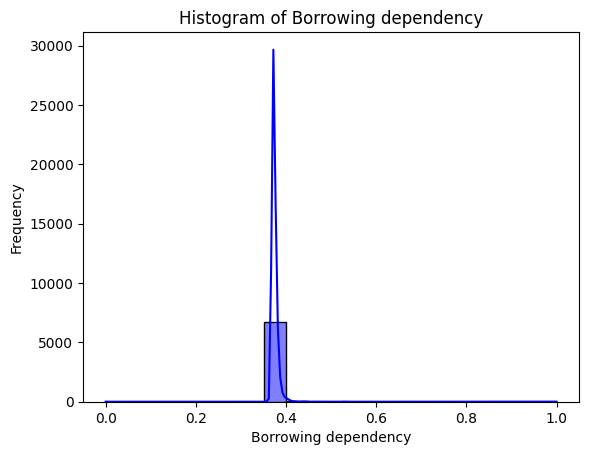

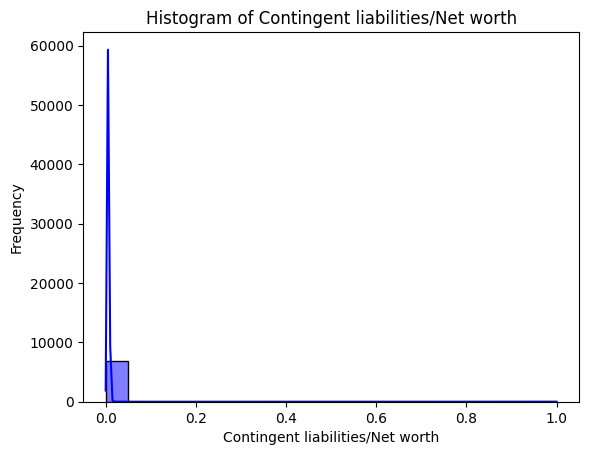

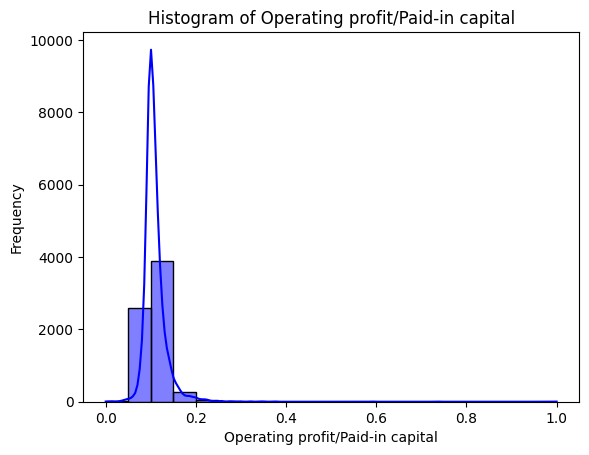

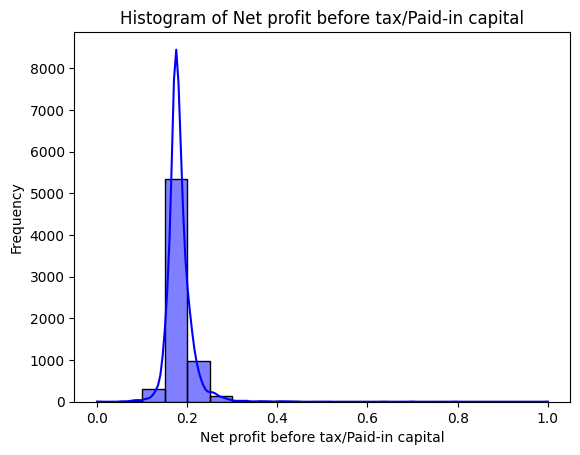

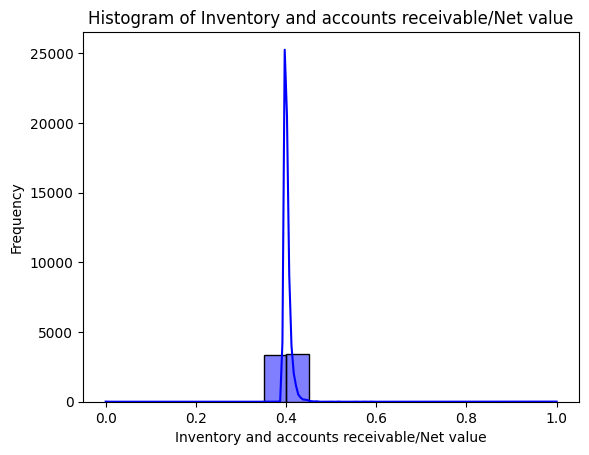

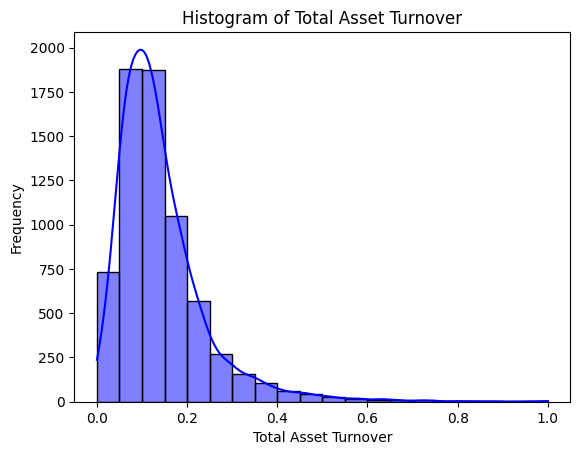

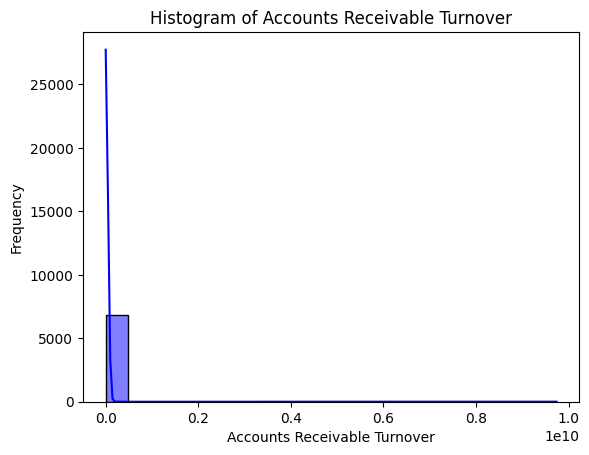

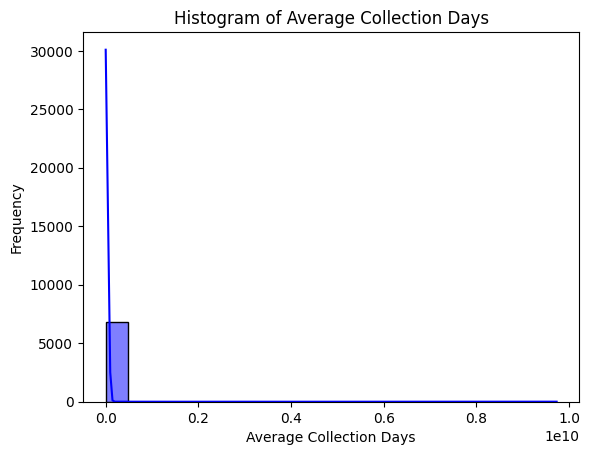

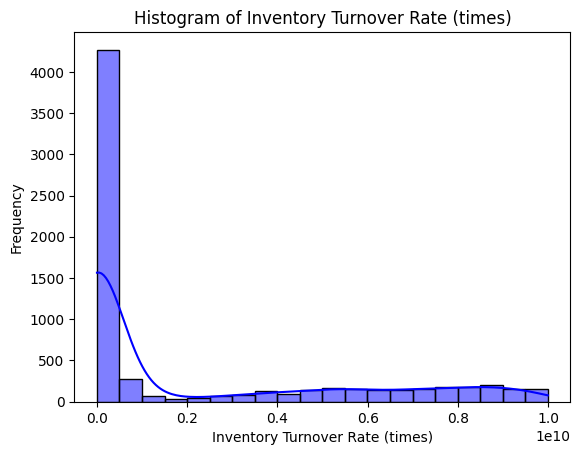

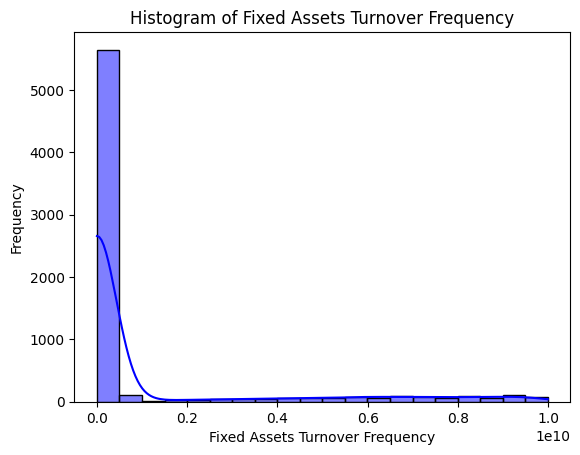

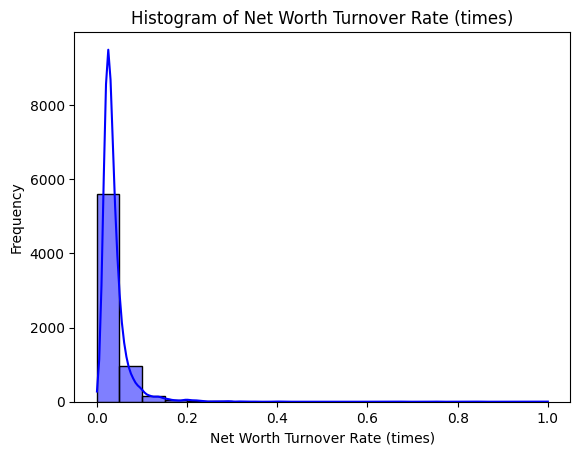

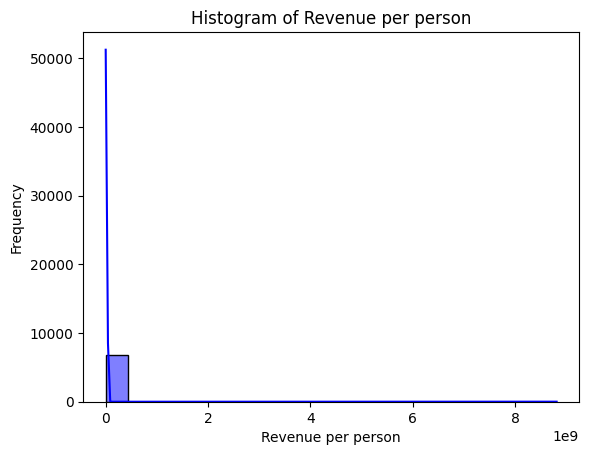

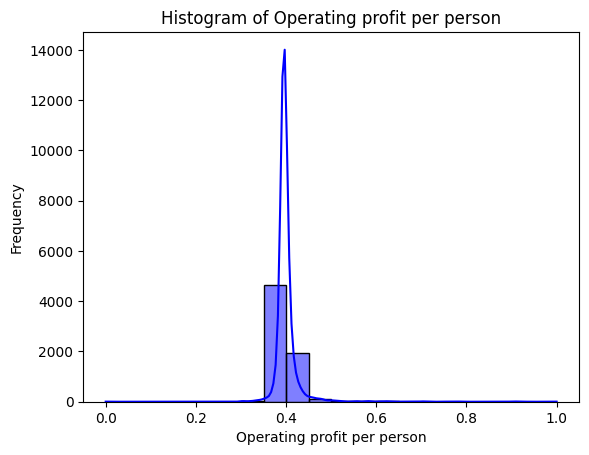

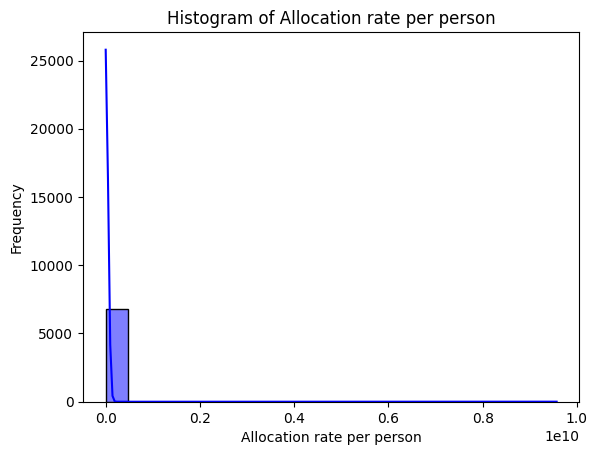

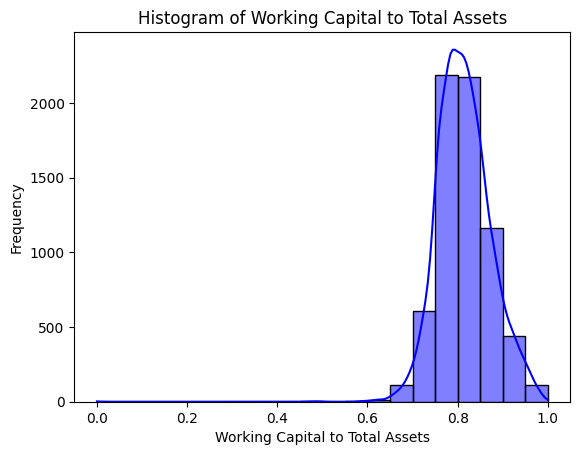

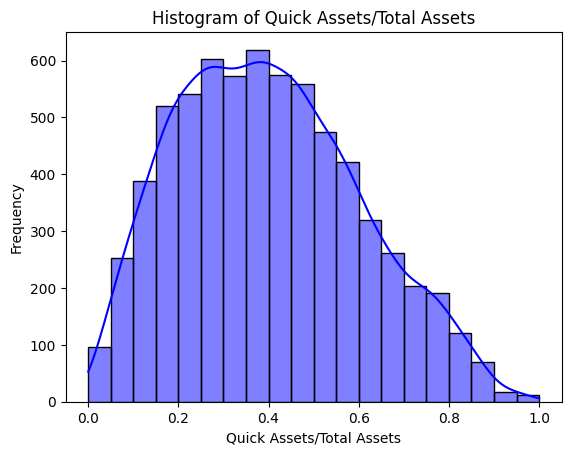

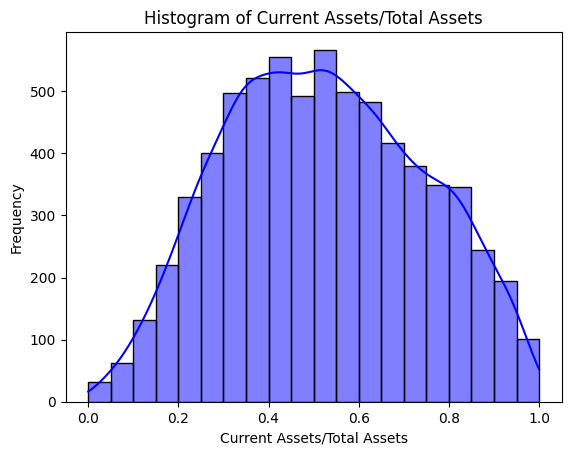

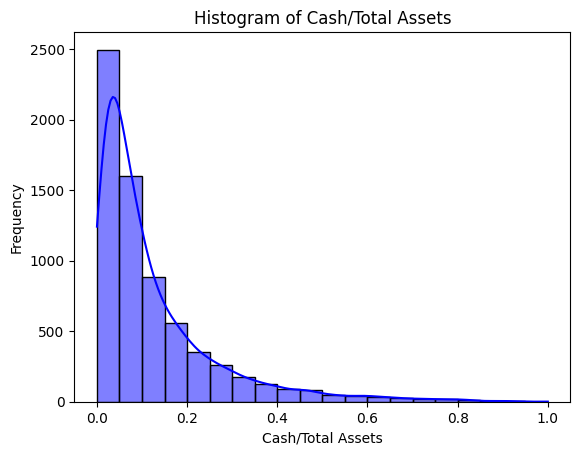

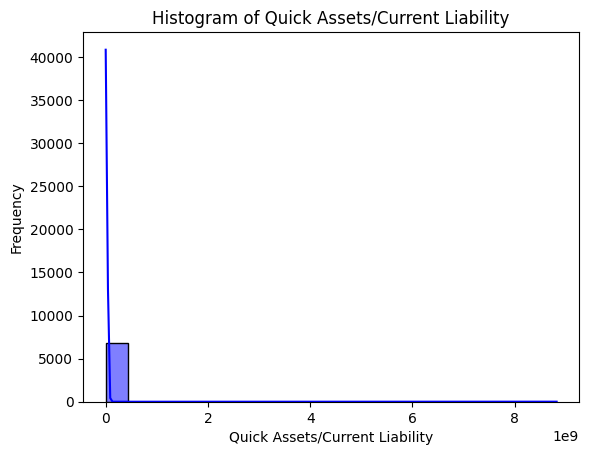

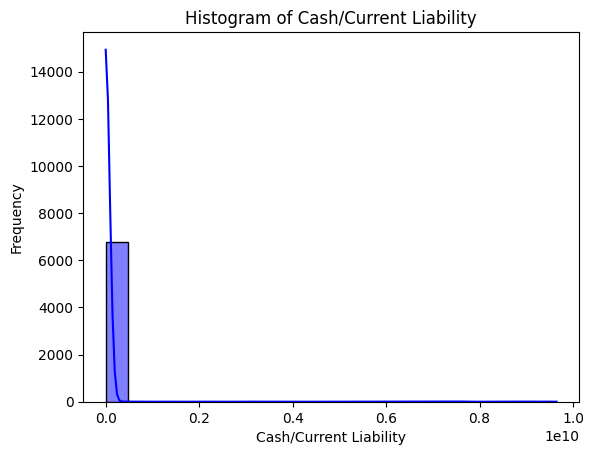

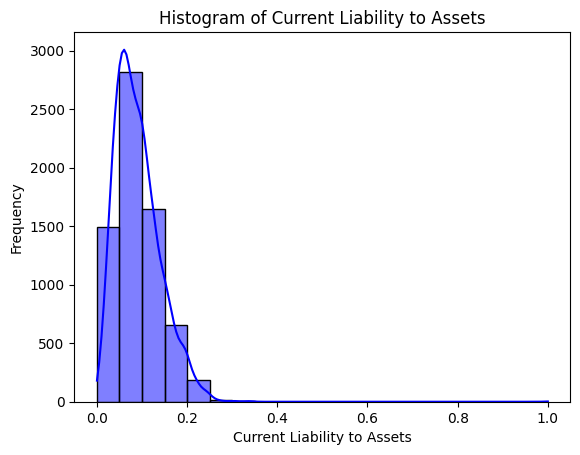

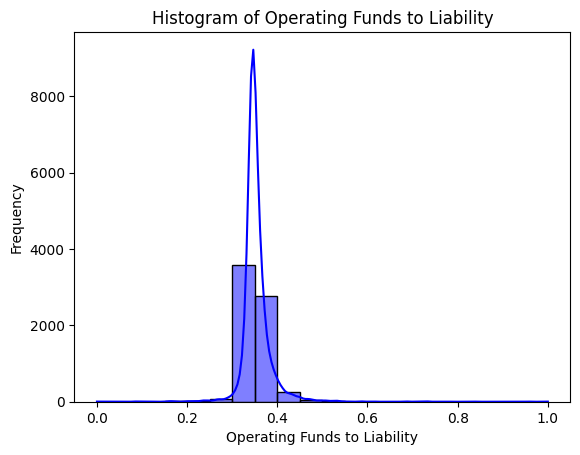

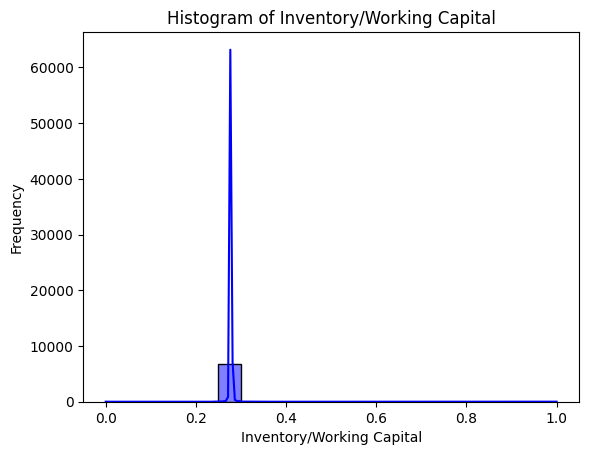

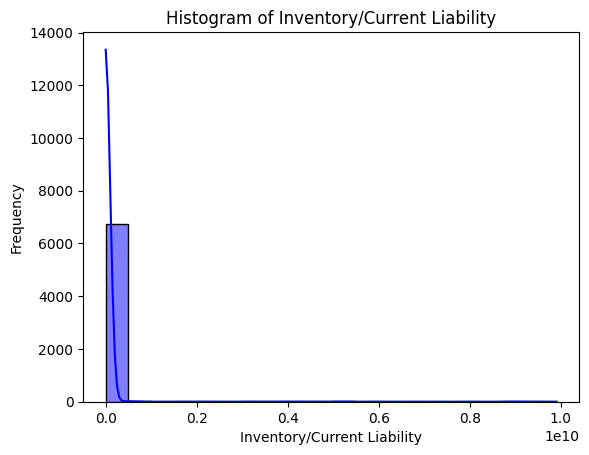

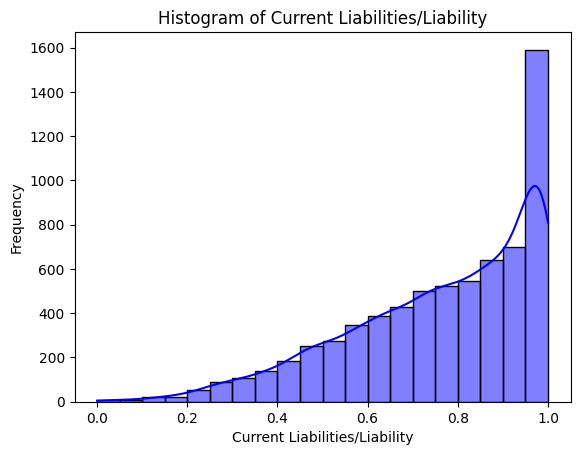

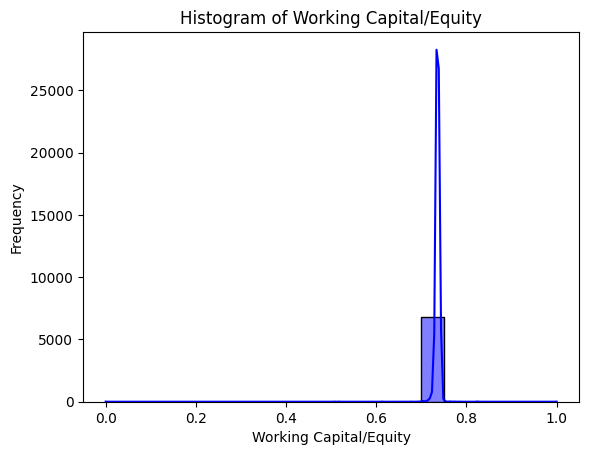

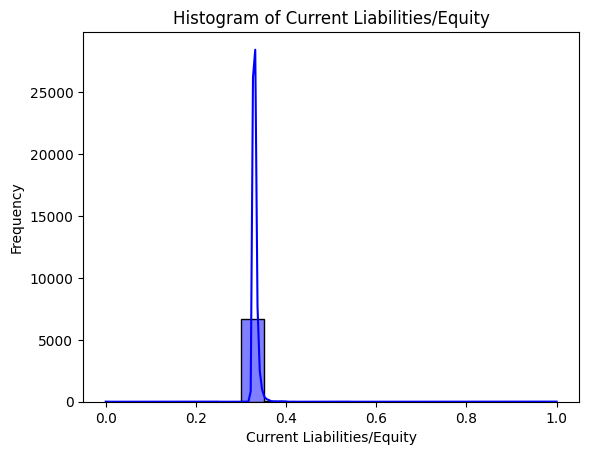

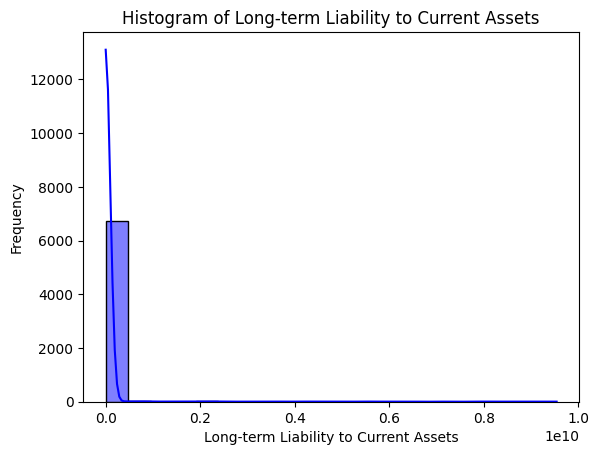

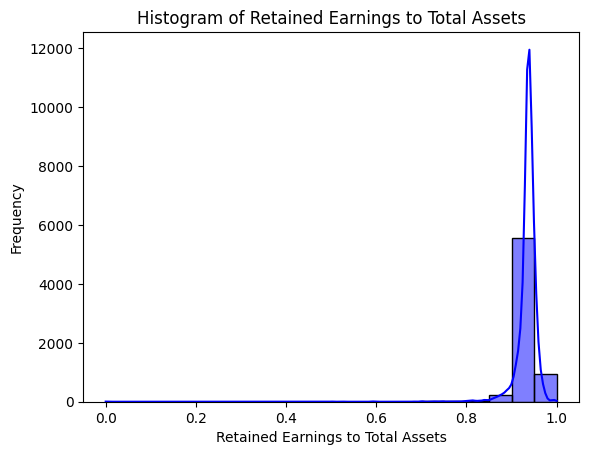

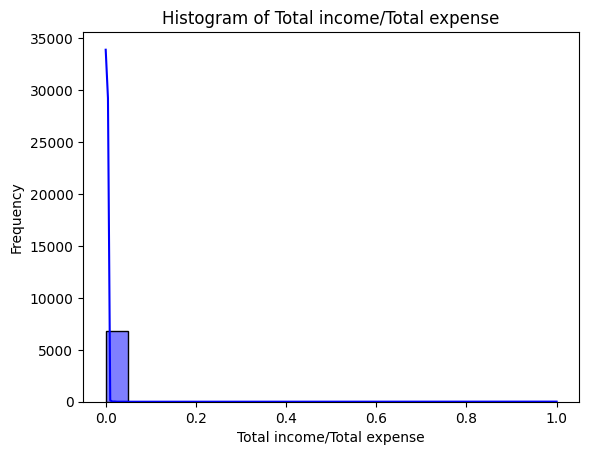

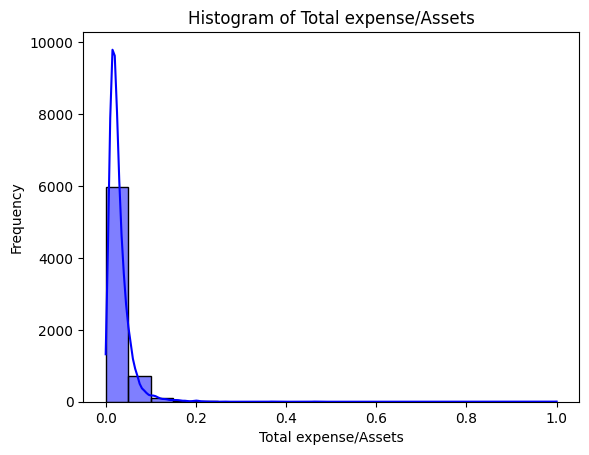

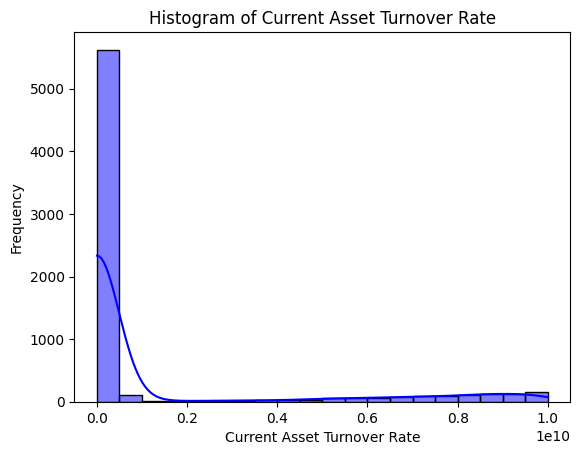

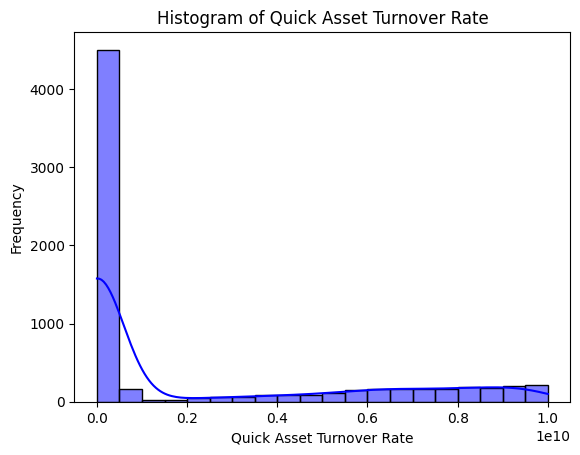

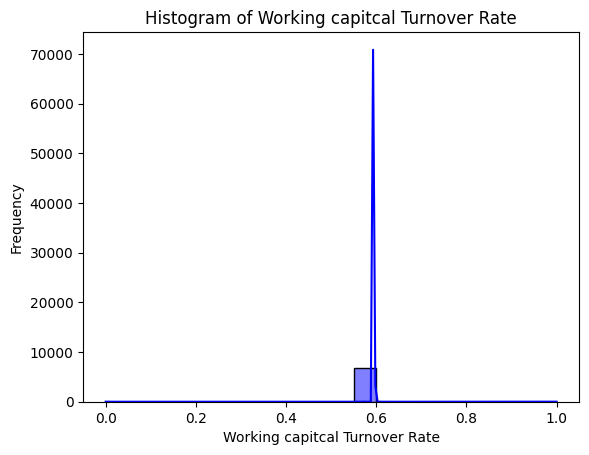

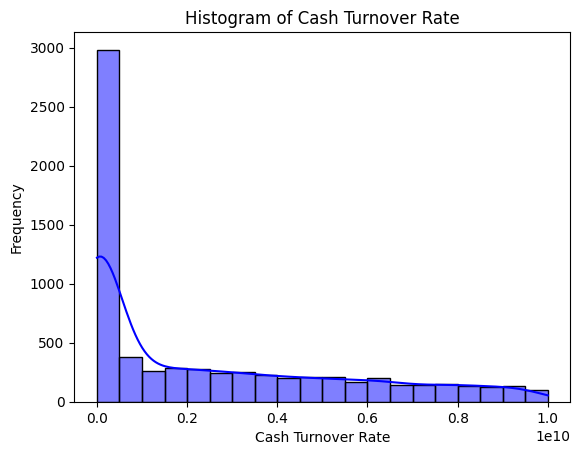

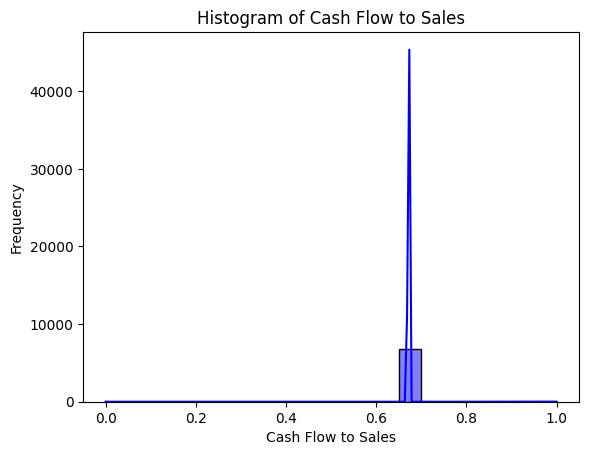

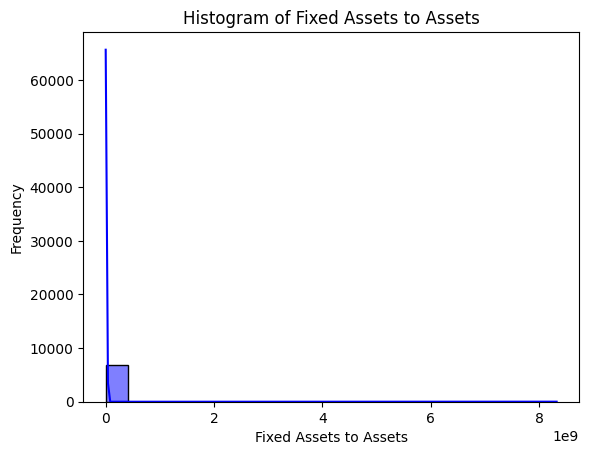

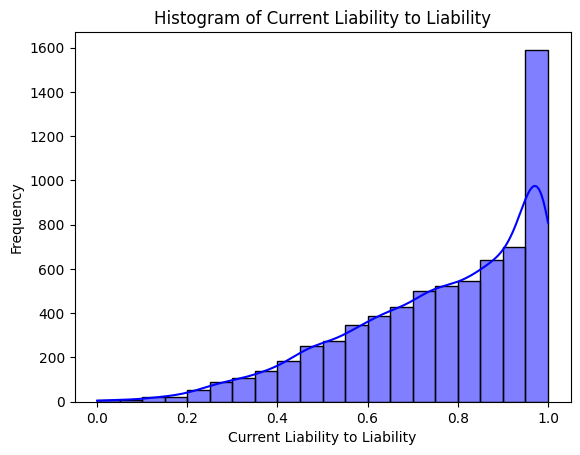

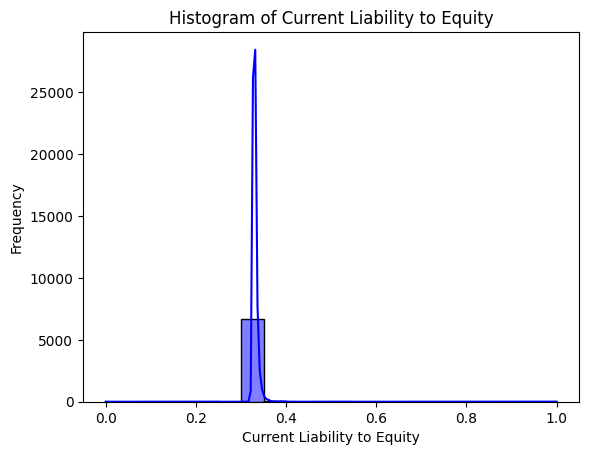

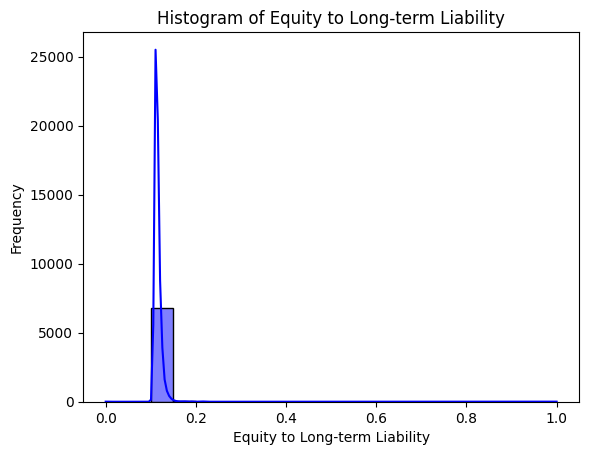

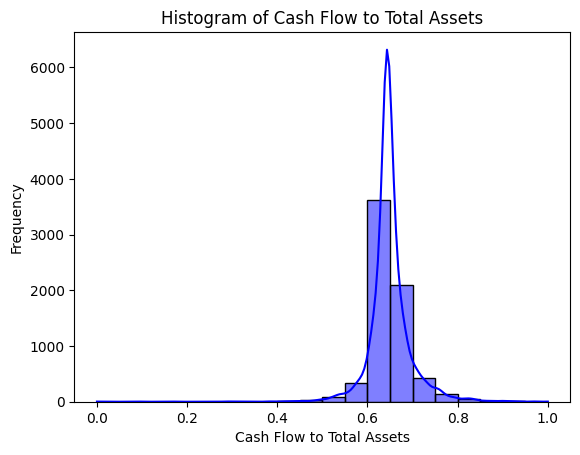

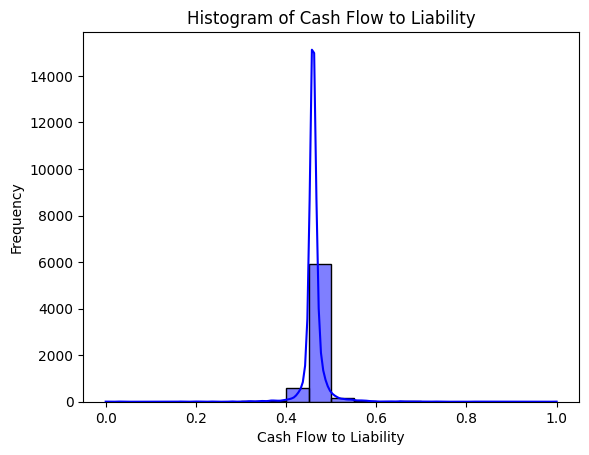

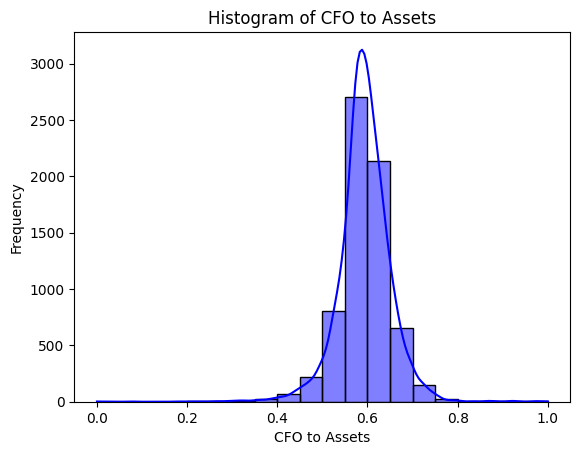

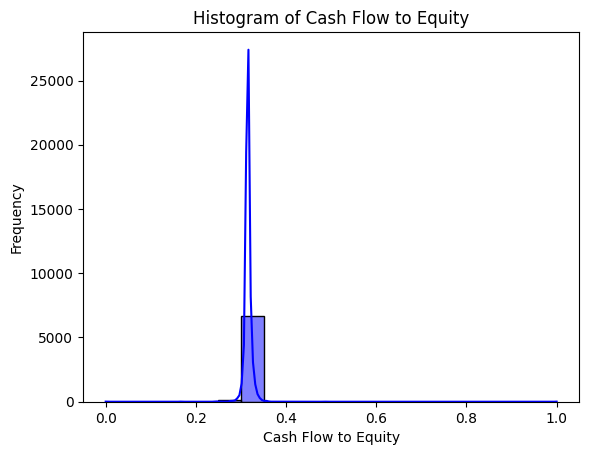

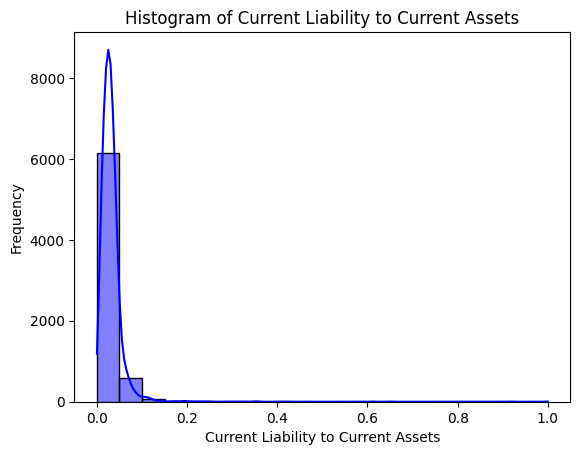

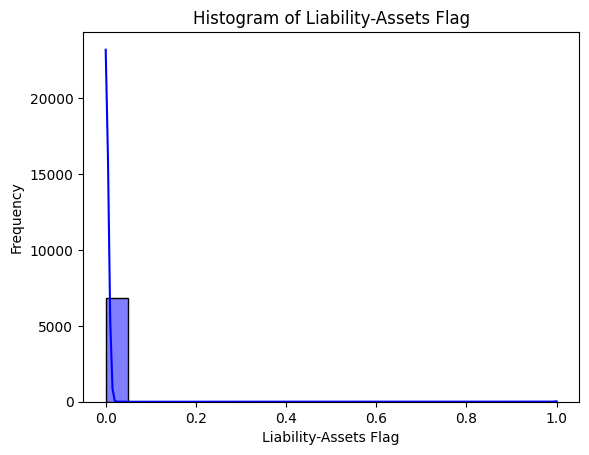

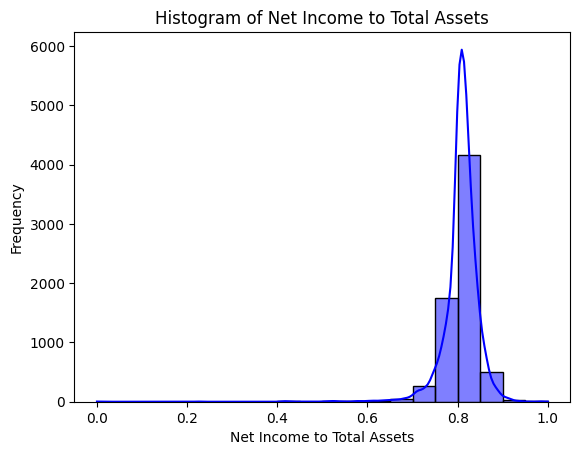

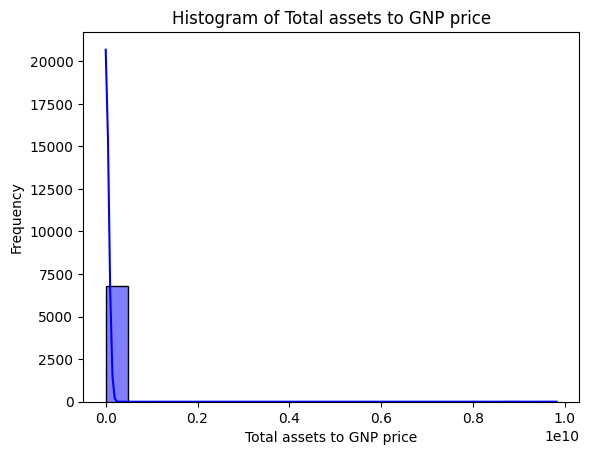

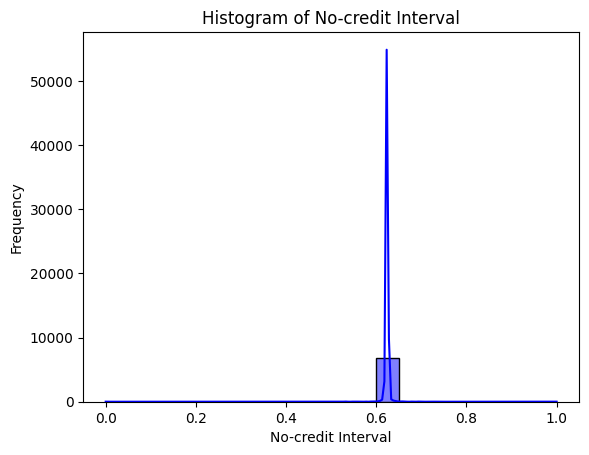

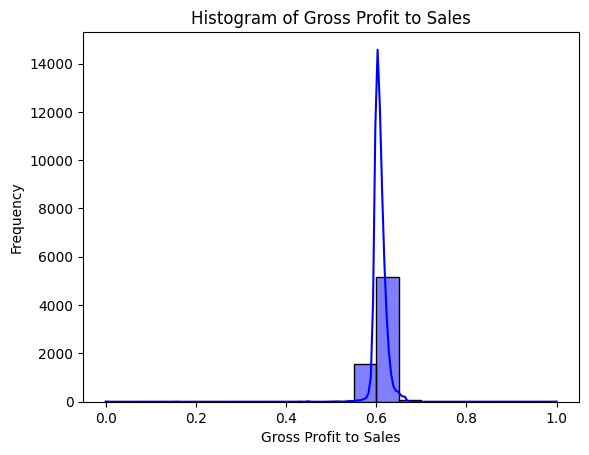

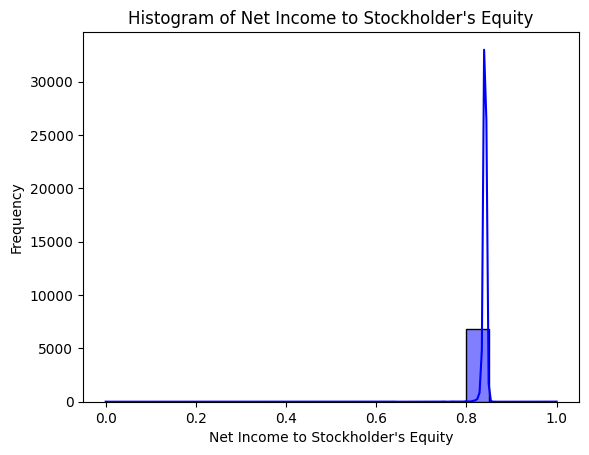

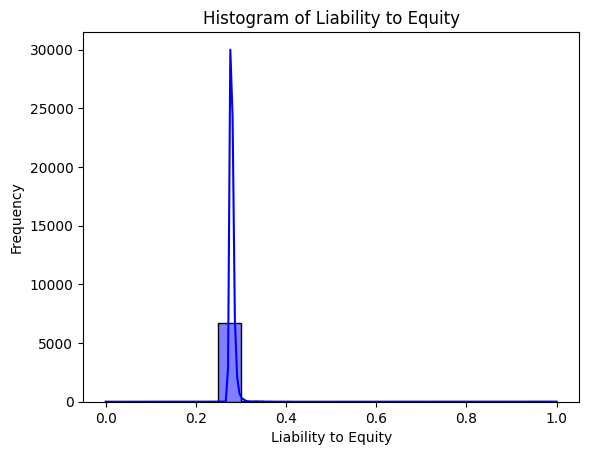

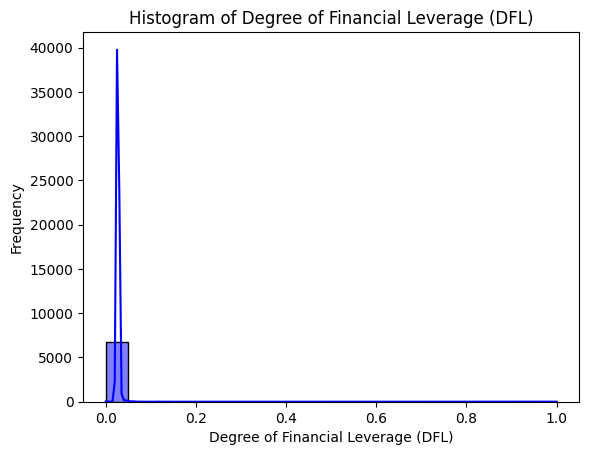

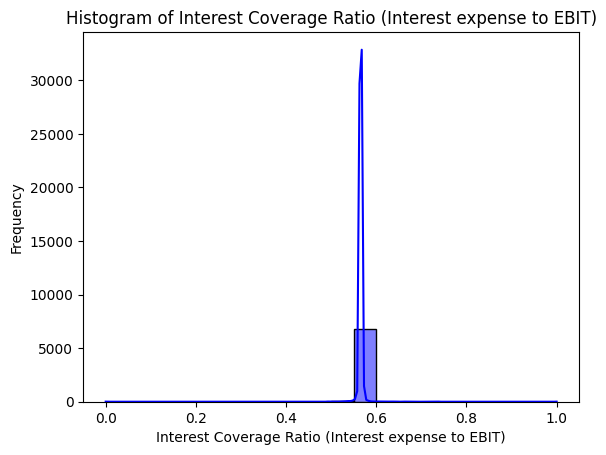

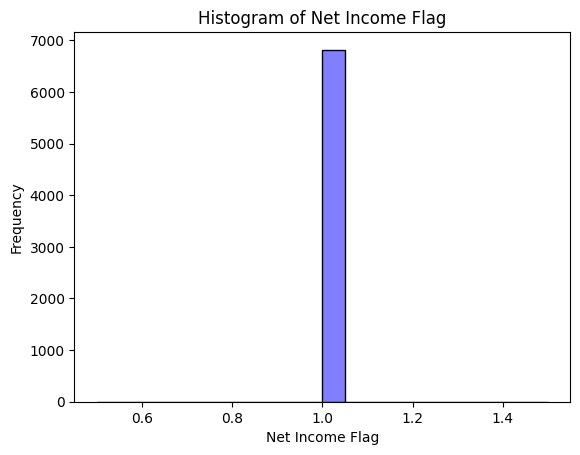

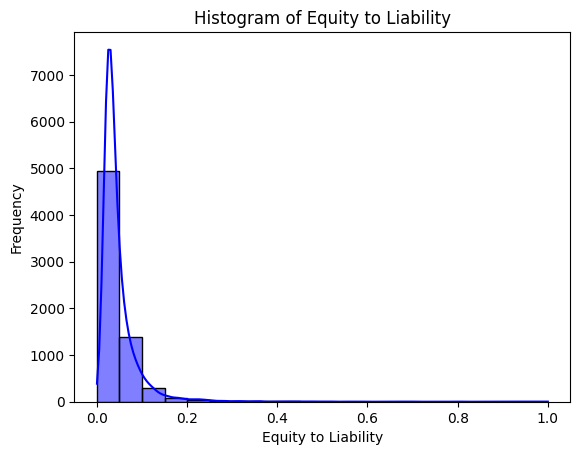

In [50]:
numerical_columns = X.select_dtypes(include=[np.number]).columns #Identify numerical columns
# Loop through columns in the dataset summary
for column in numerical_columns:
    plt.title(f'Histogram of {column}')  # Set the plot title
    sns.histplot(X[column], kde=True, color='blue', bins=20)  # Plot histogram with KDE
    plt.xlabel(column)  # Label x-axis
    plt.ylabel('Frequency')  # Label y-axis
    plt.show()  # Display the plot

- Based on the Histogram, we can see that our `data is not normally distributed` most of the histograms are either left tailed or right tailed so `IQR` is the best choice for identifying the Outliers.

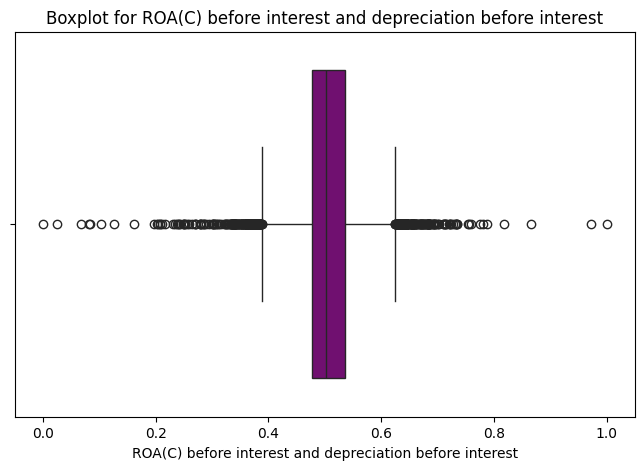

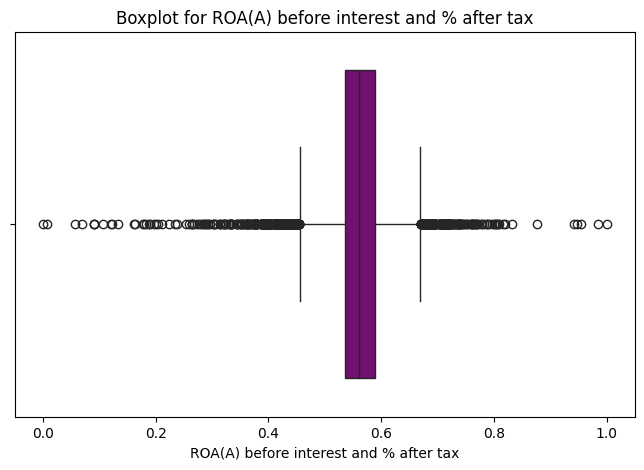

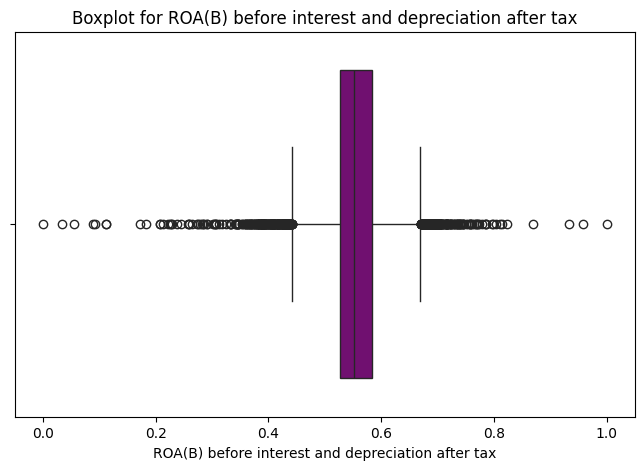

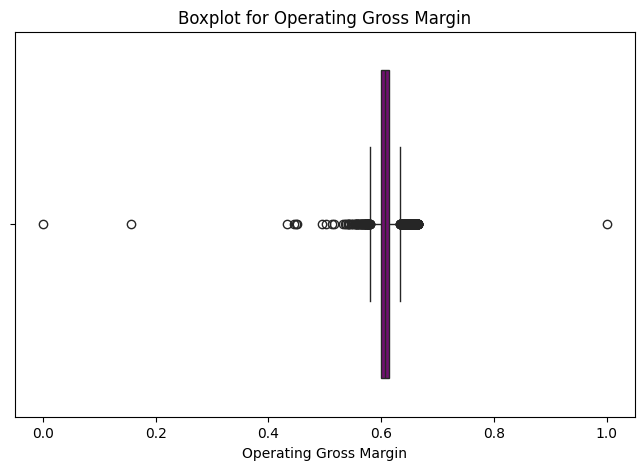

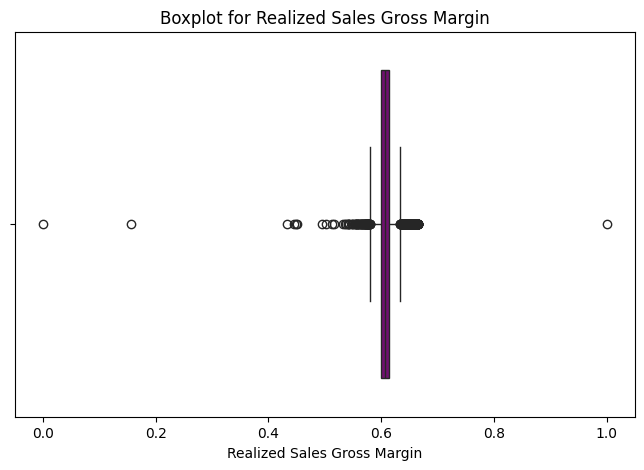

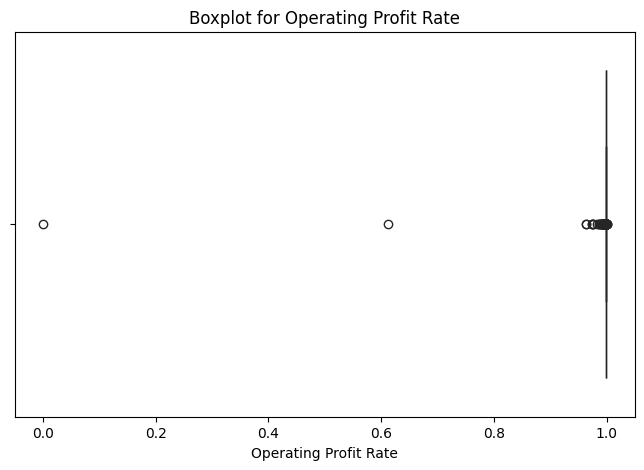

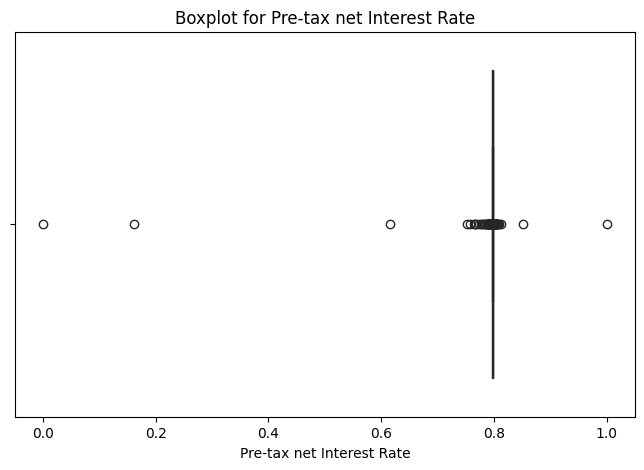

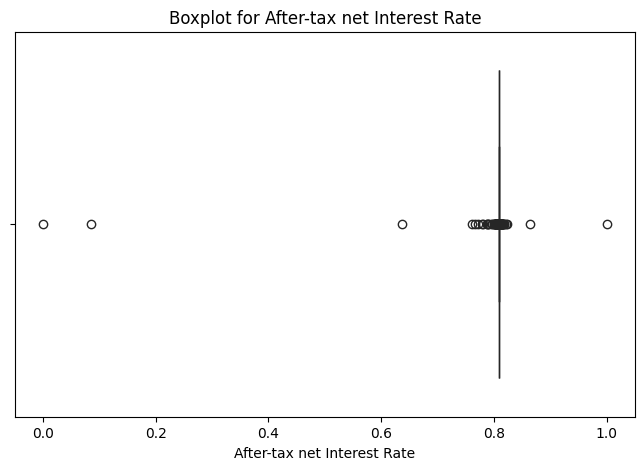

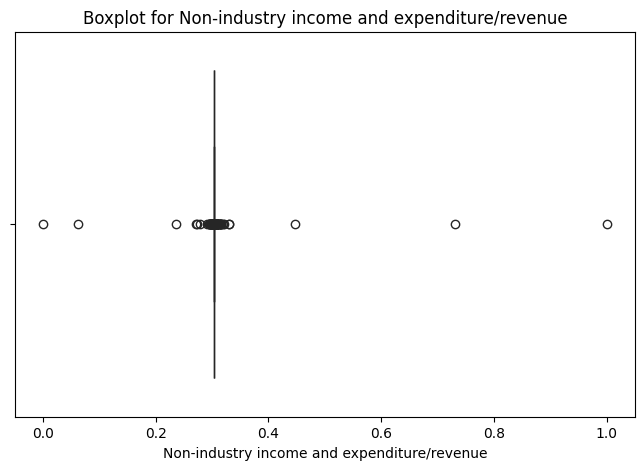

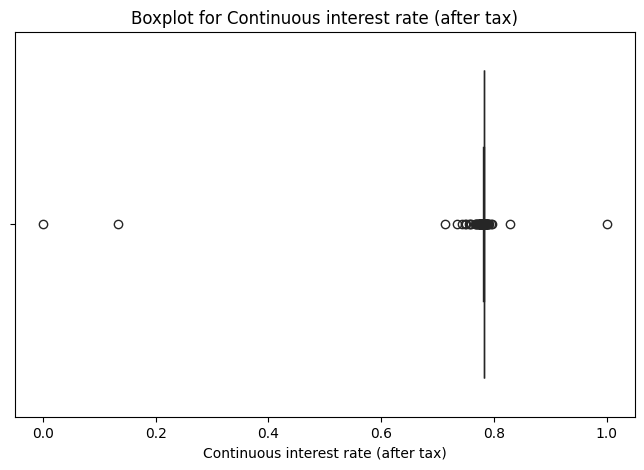

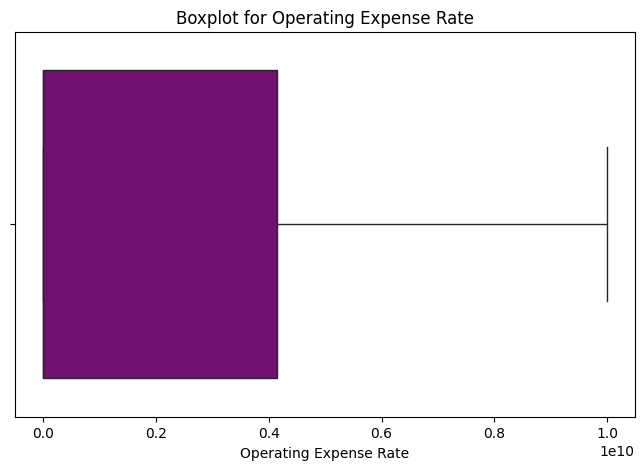

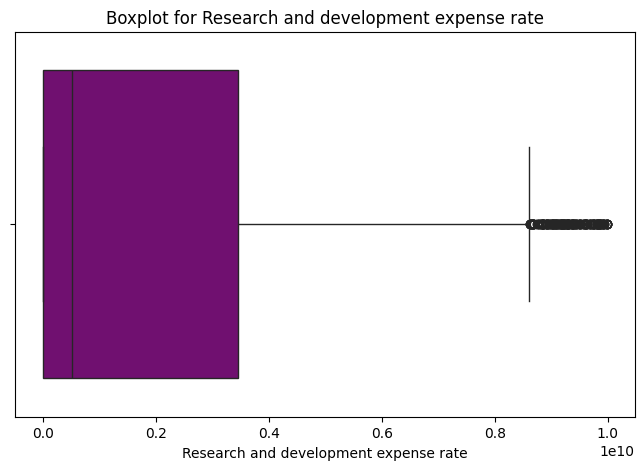

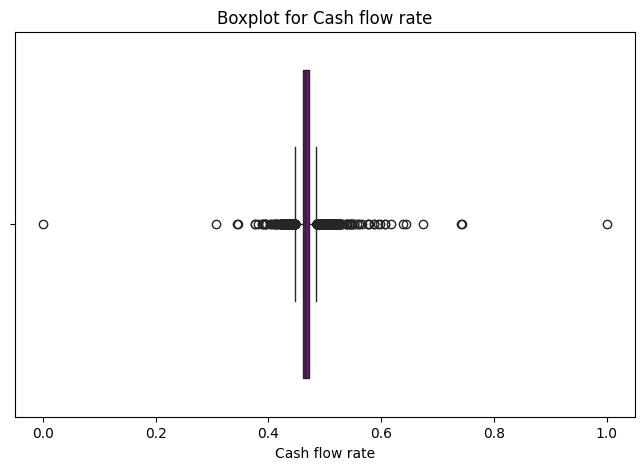

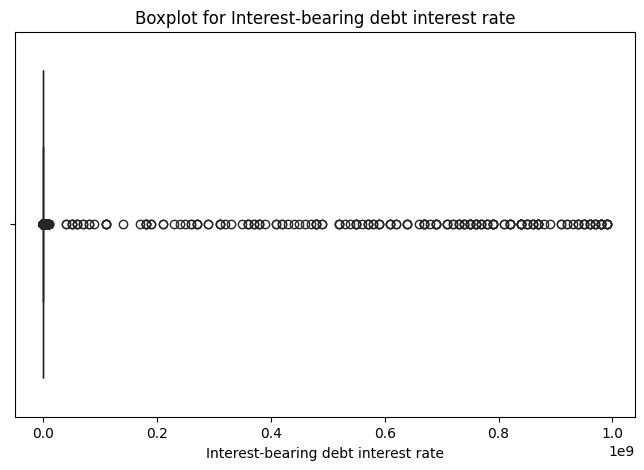

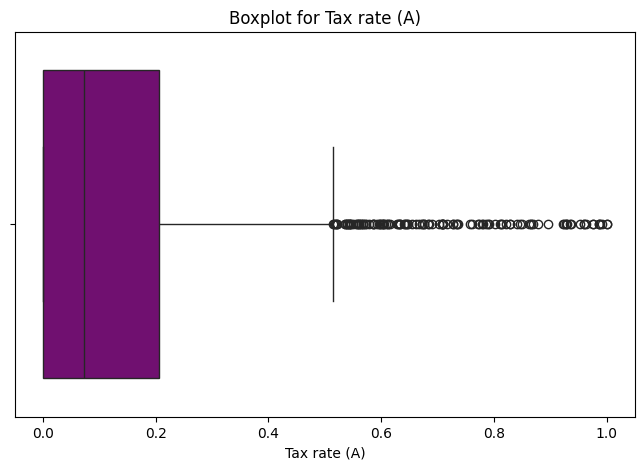

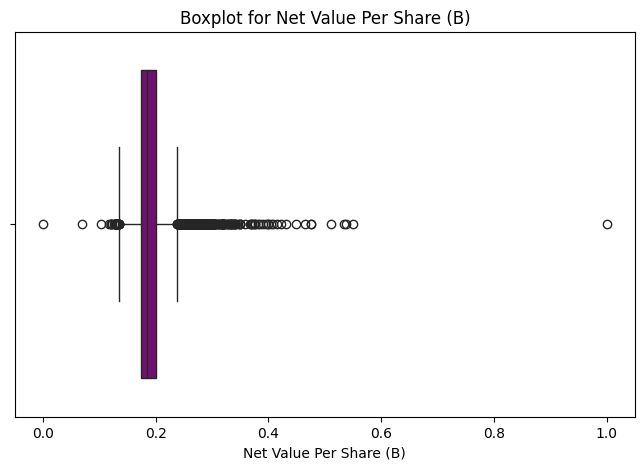

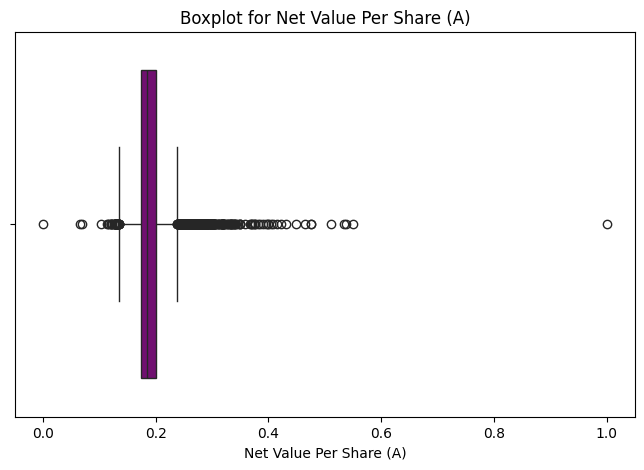

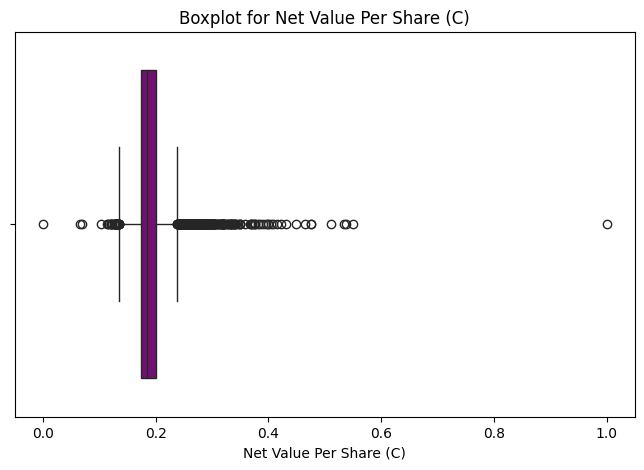

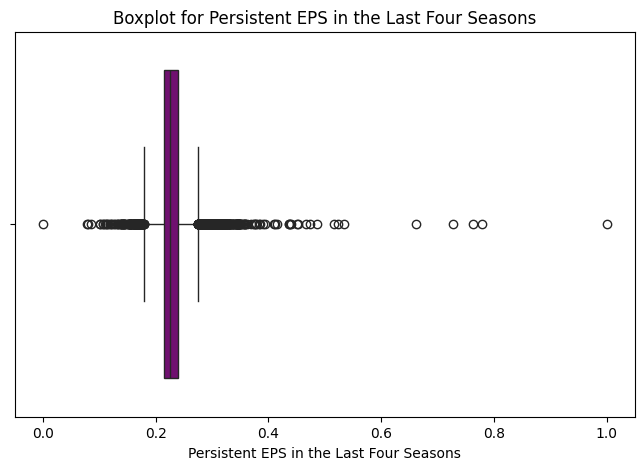

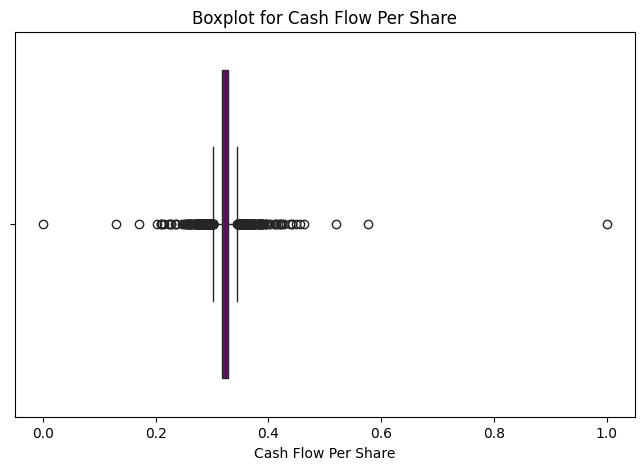

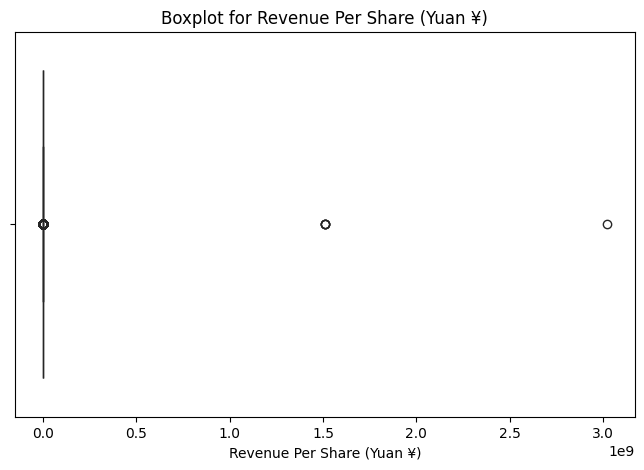

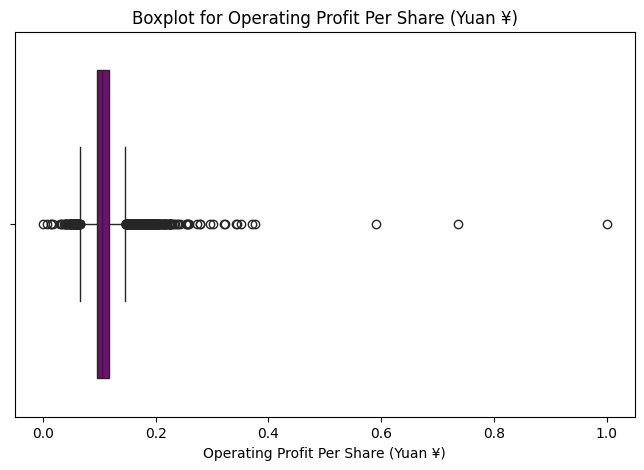

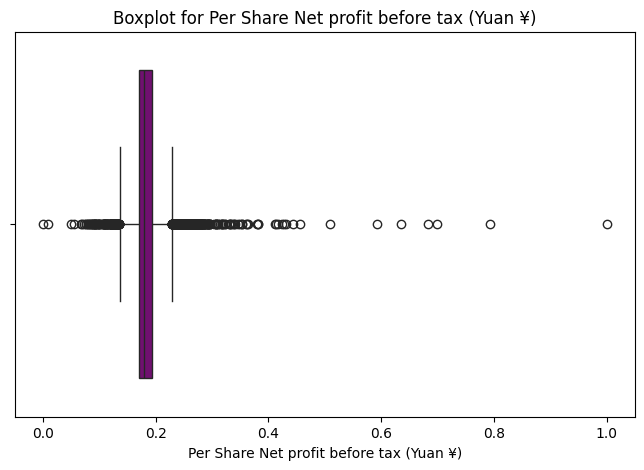

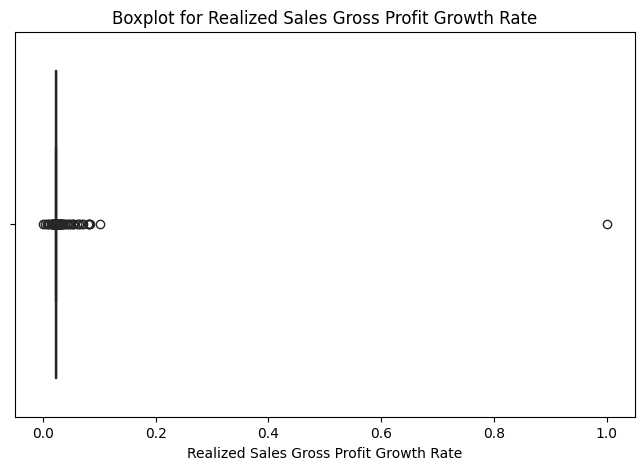

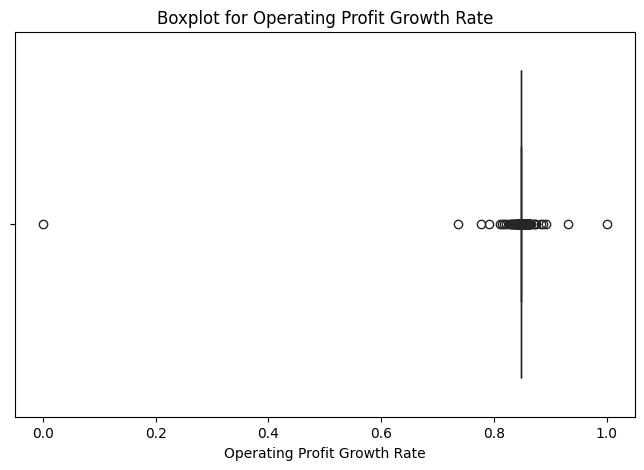

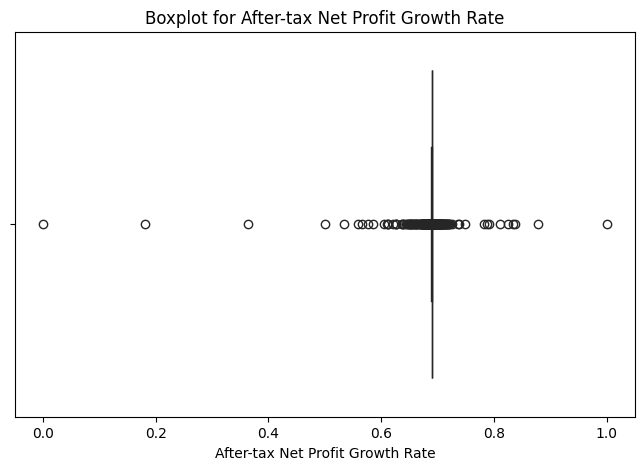

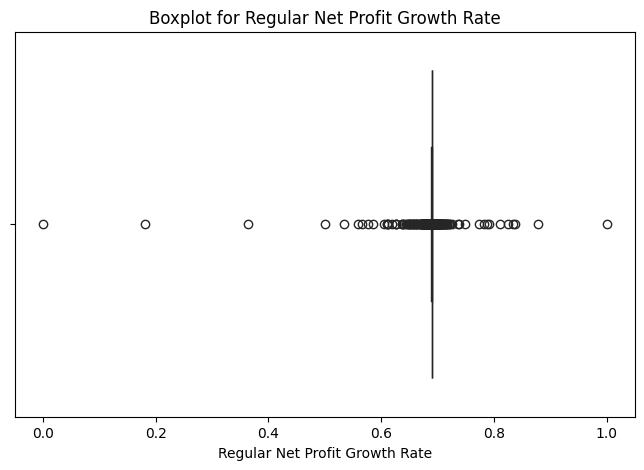

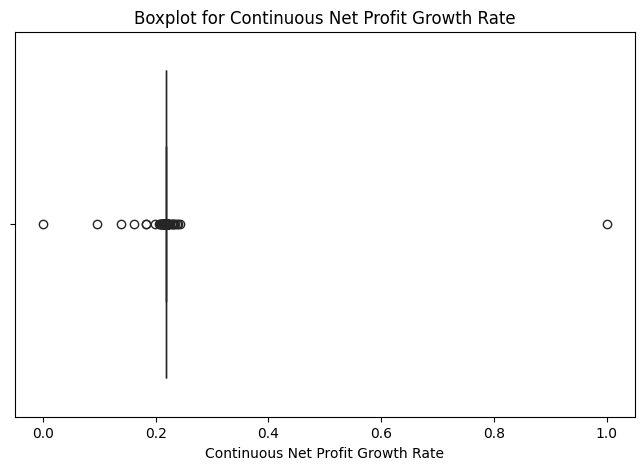

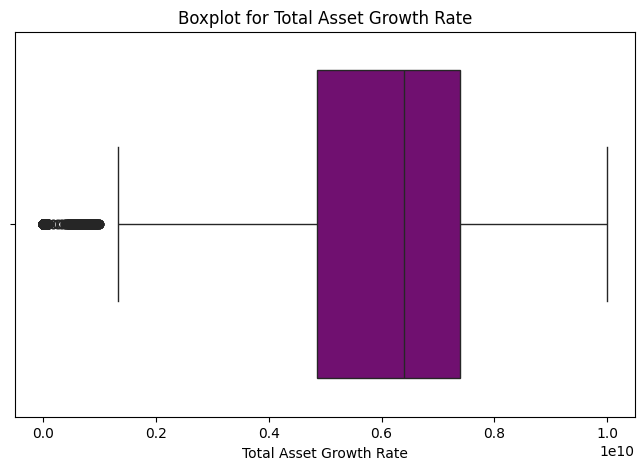

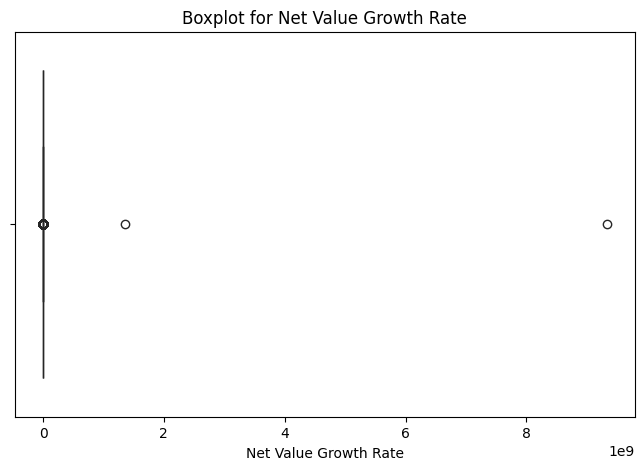

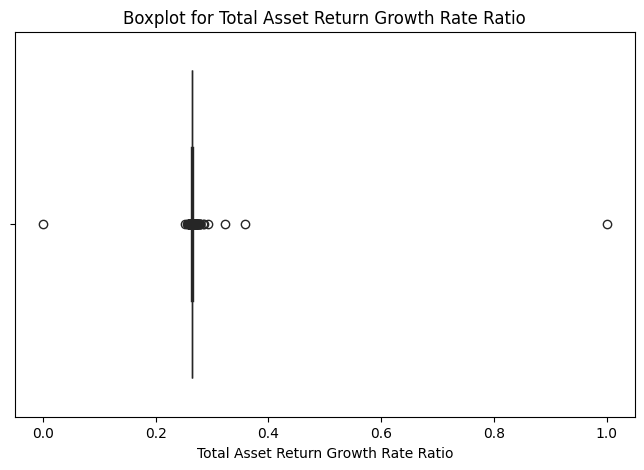

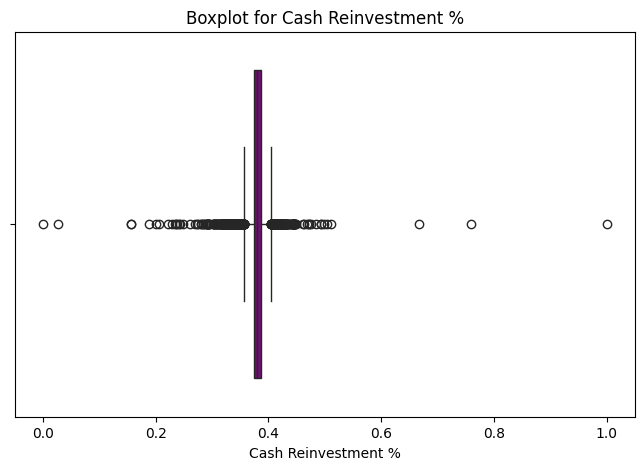

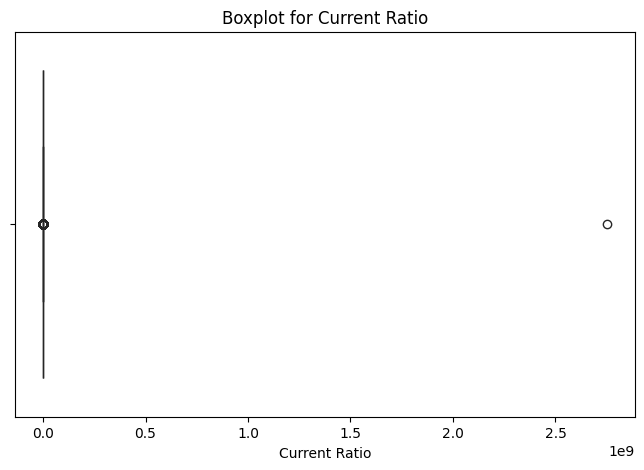

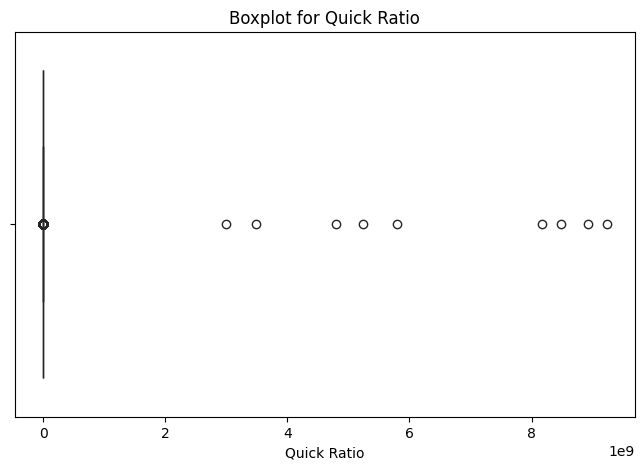

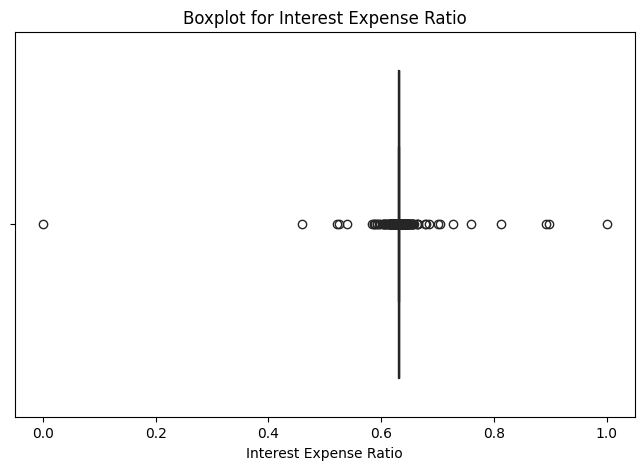

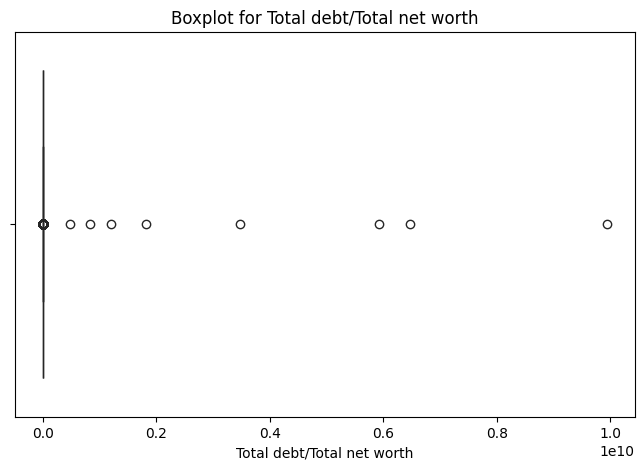

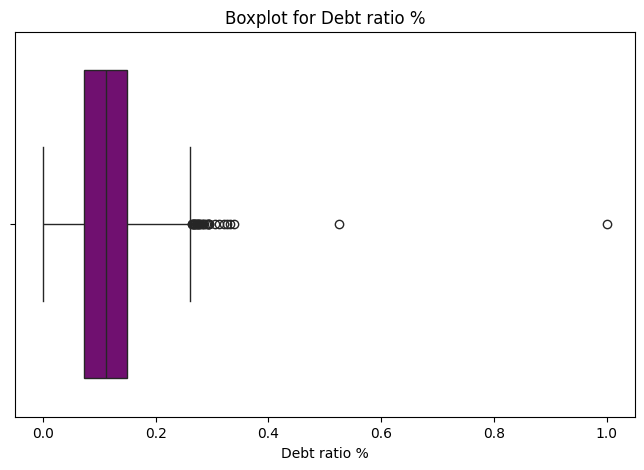

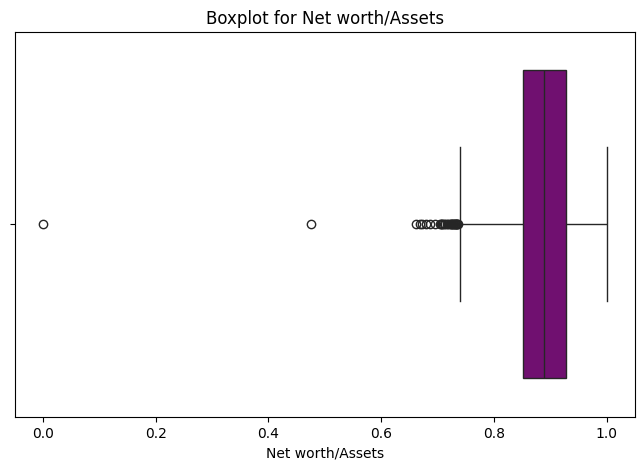

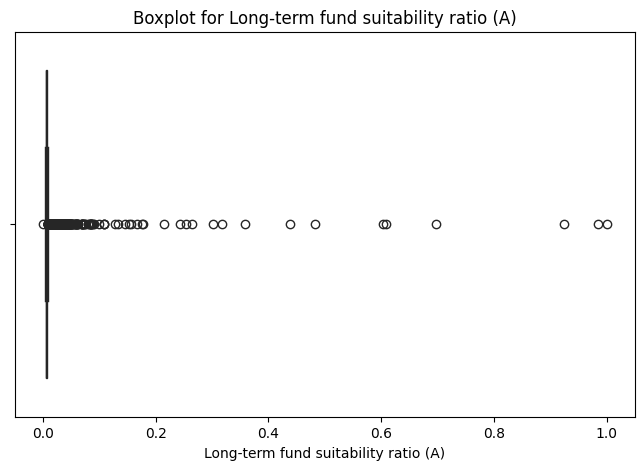

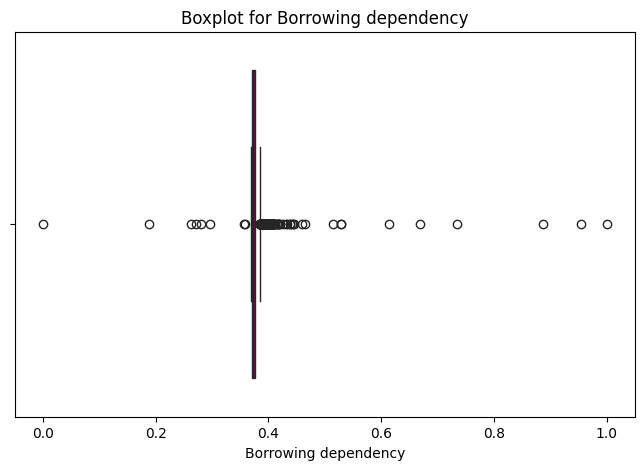

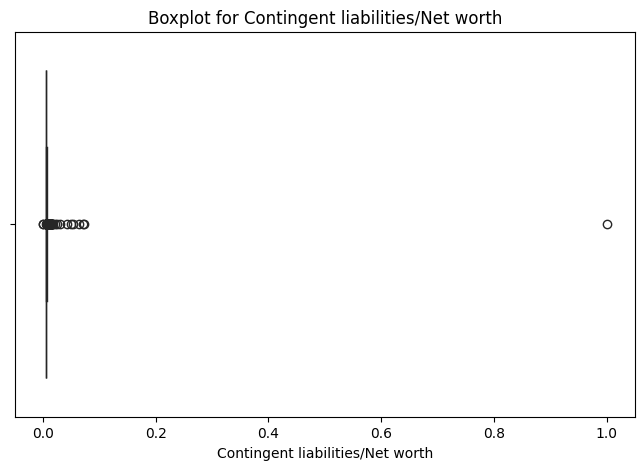

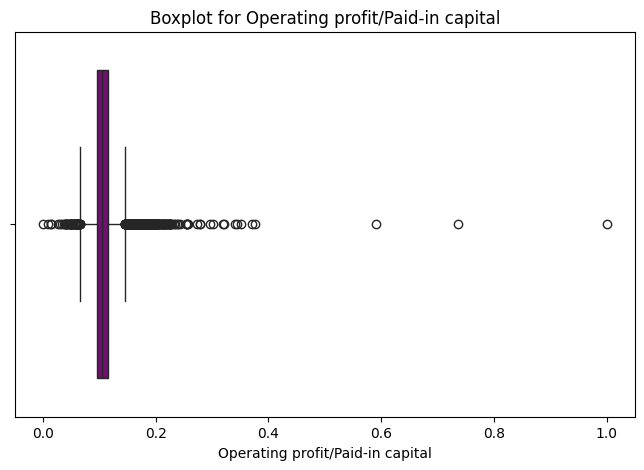

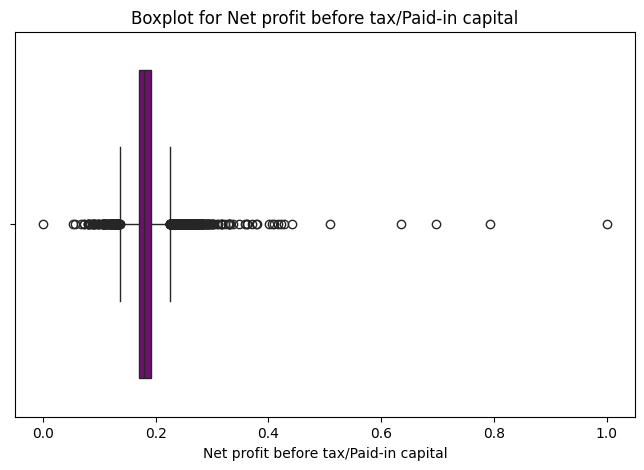

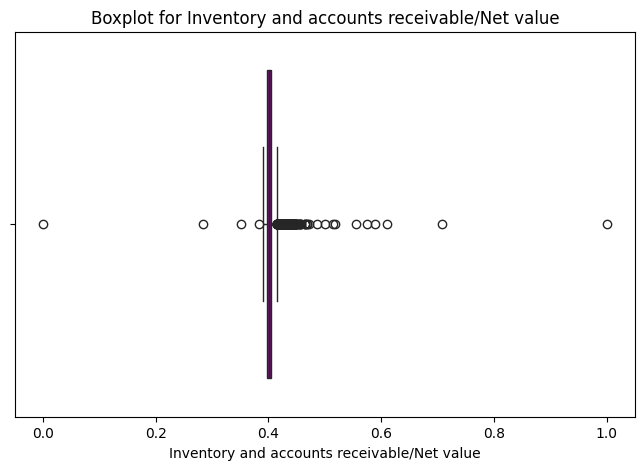

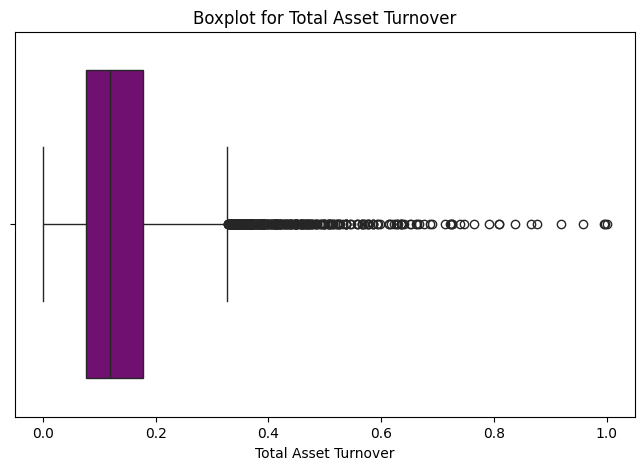

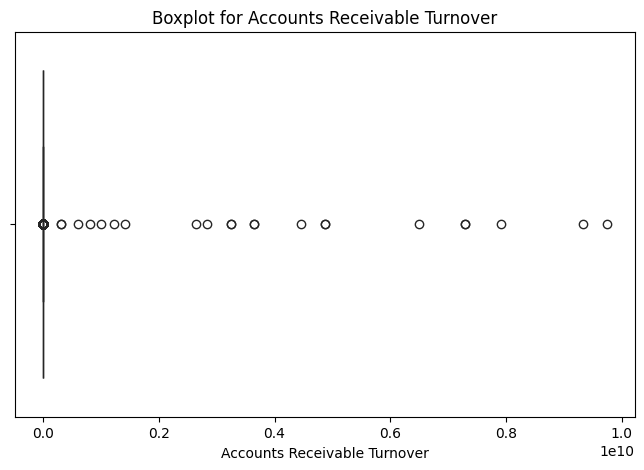

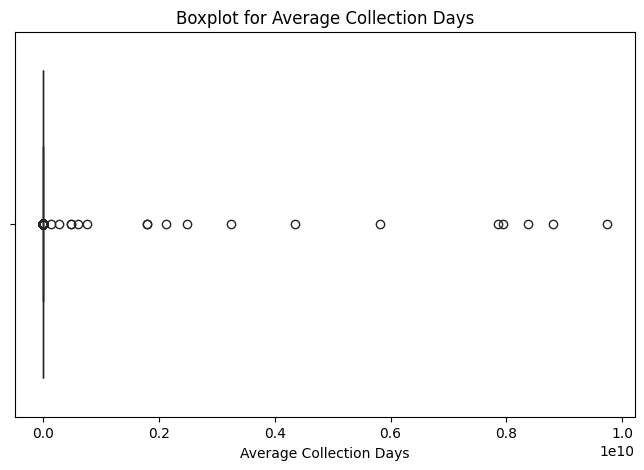

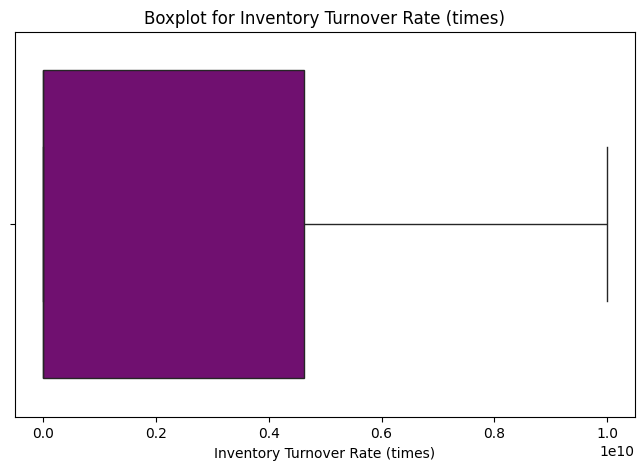

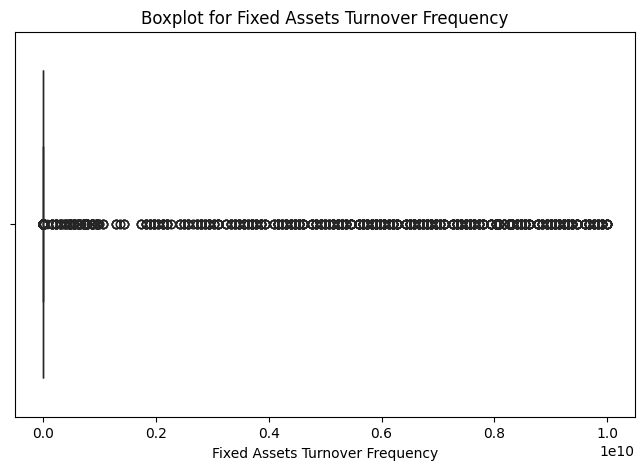

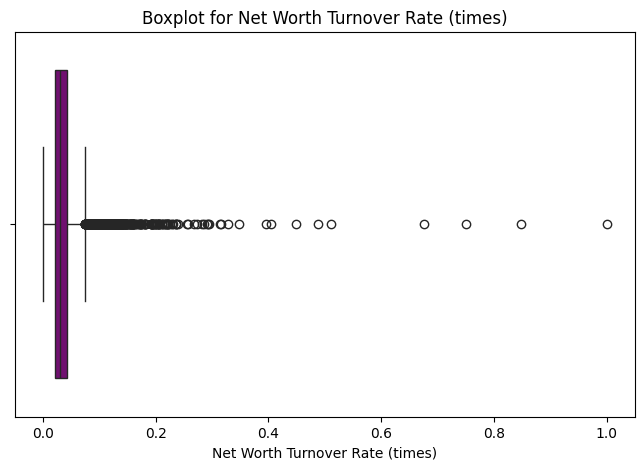

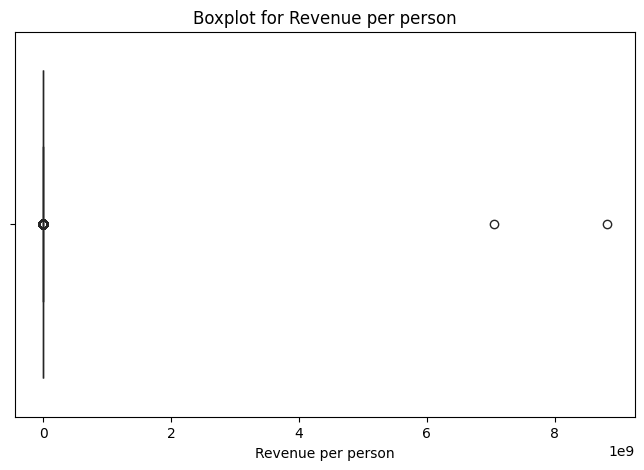

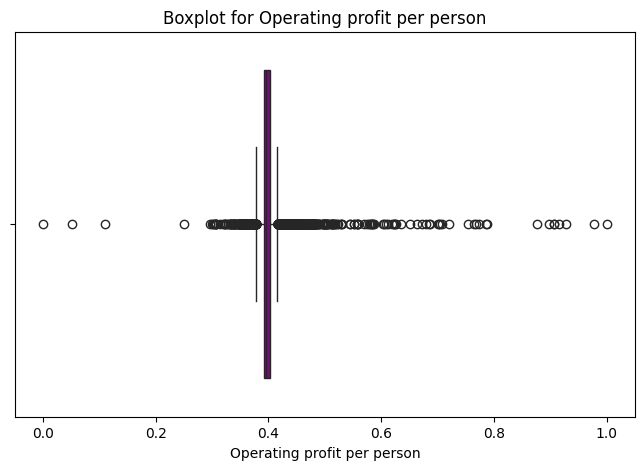

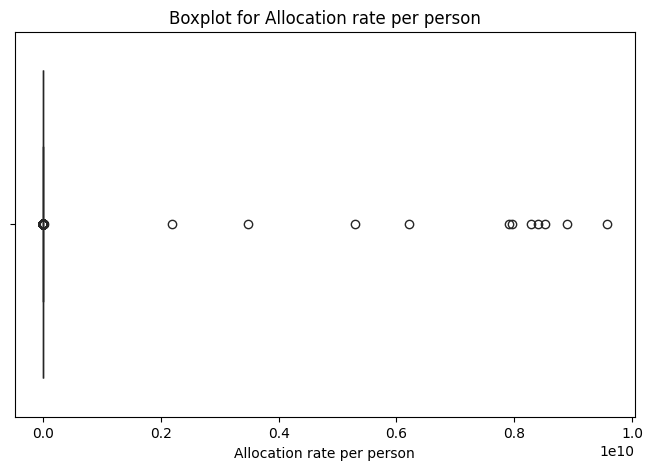

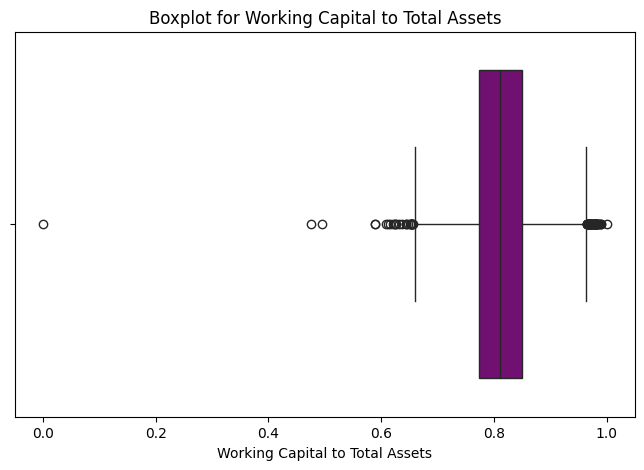

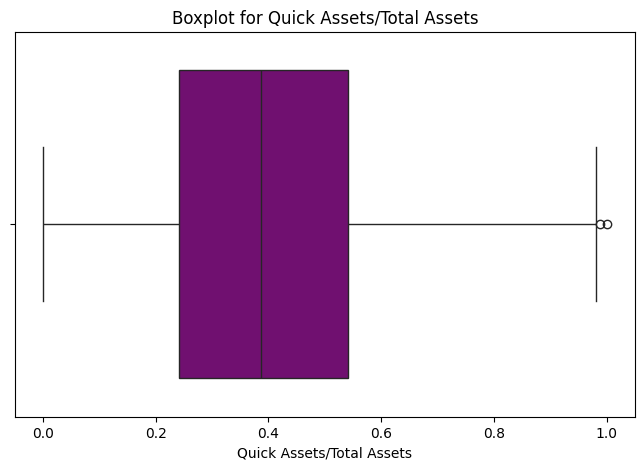

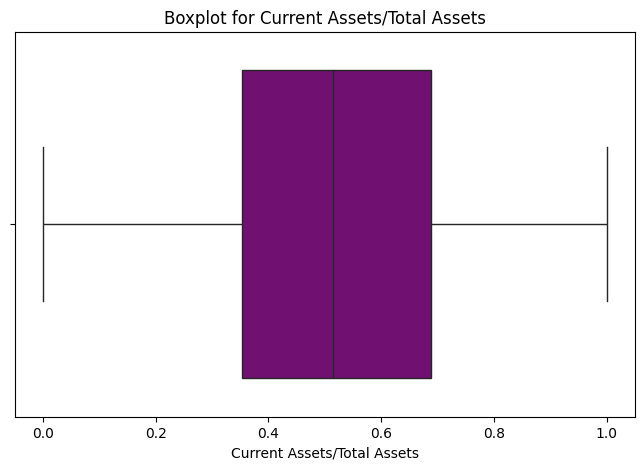

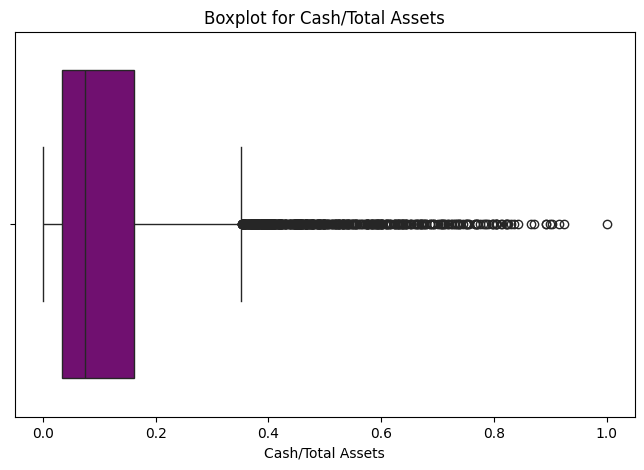

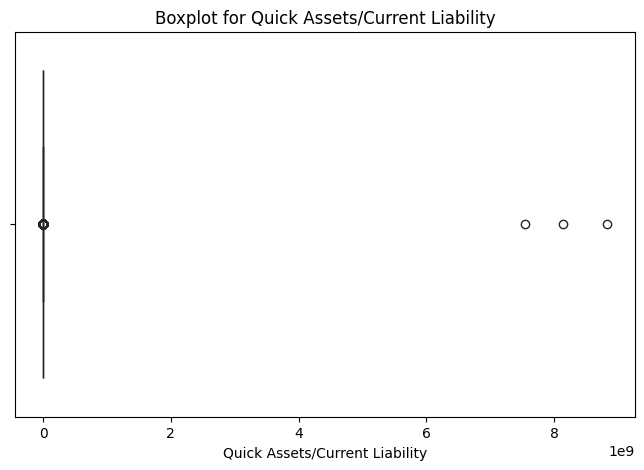

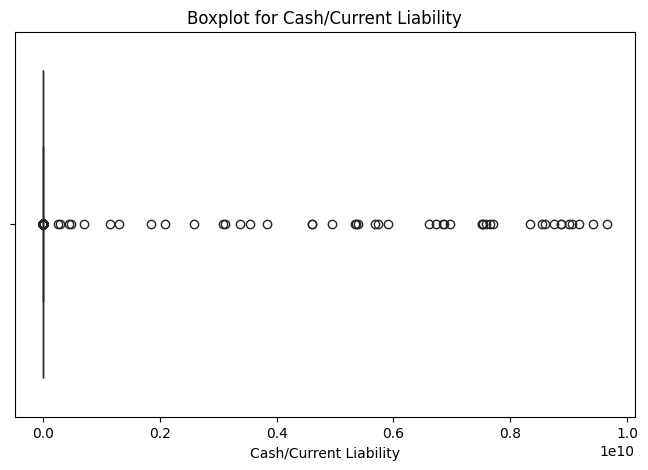

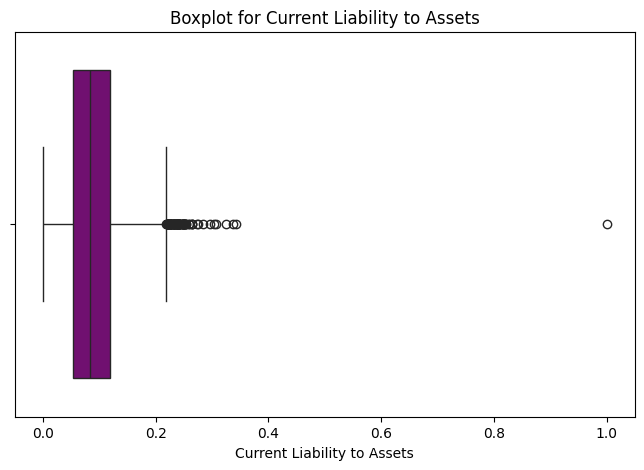

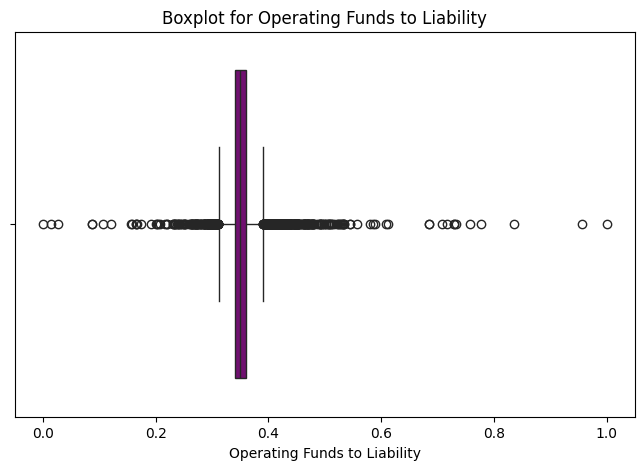

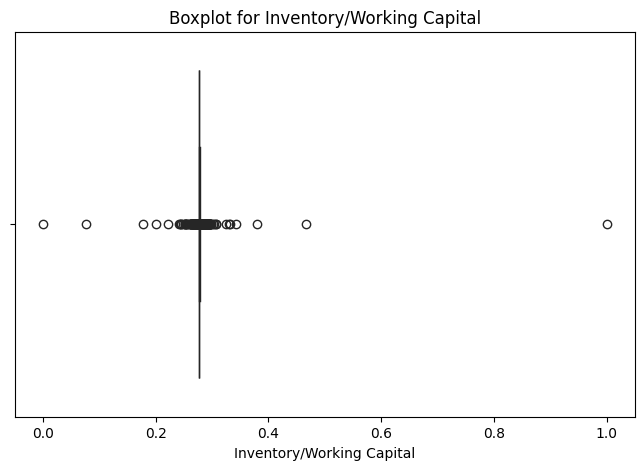

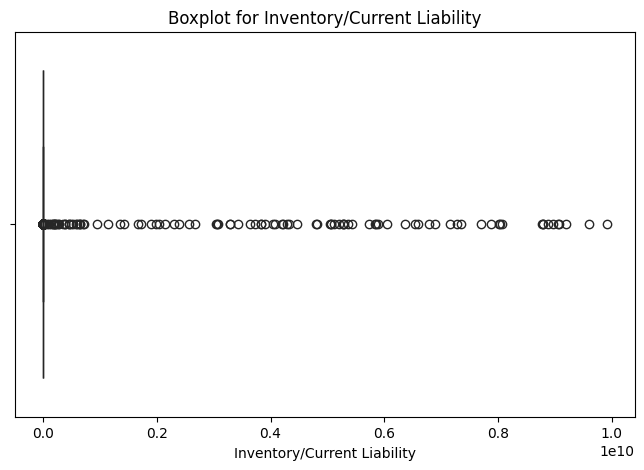

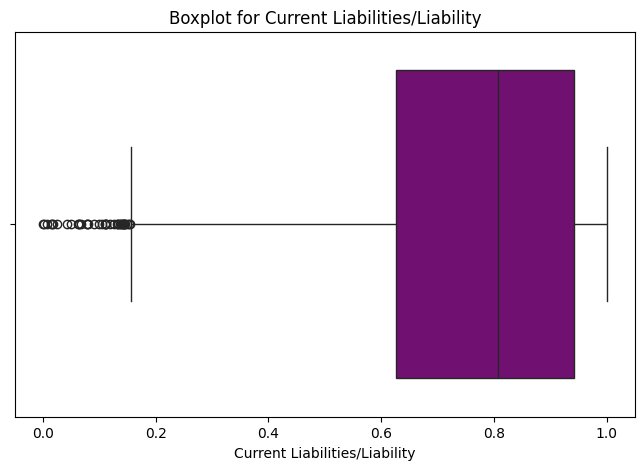

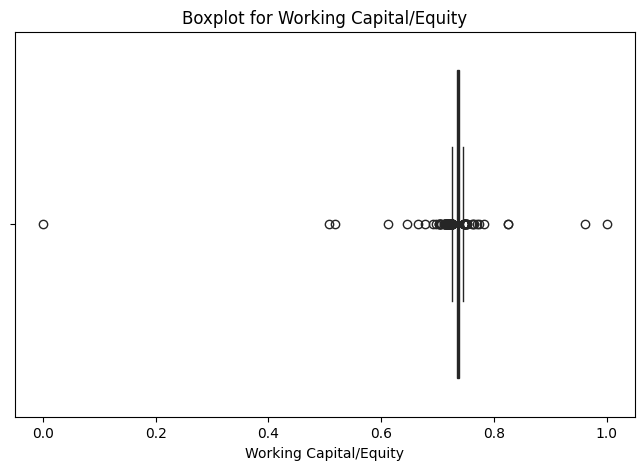

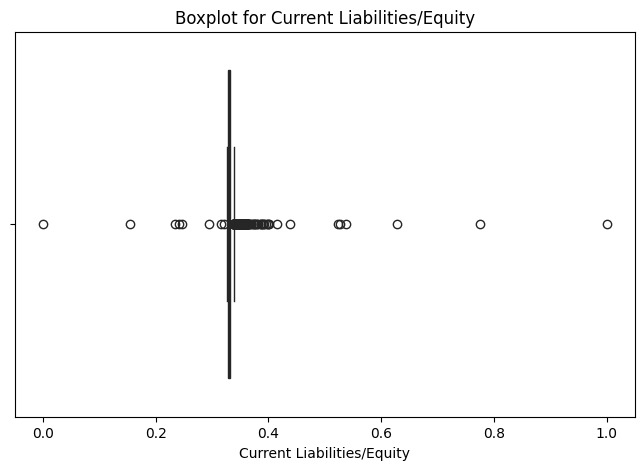

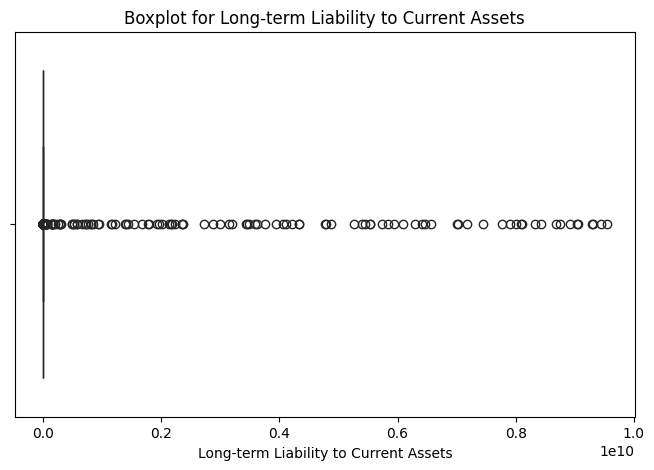

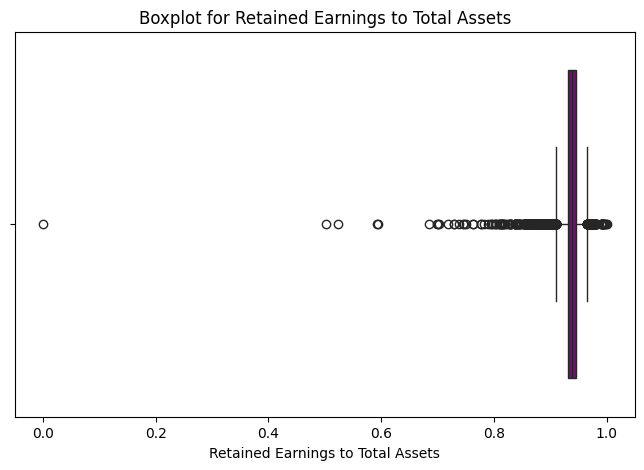

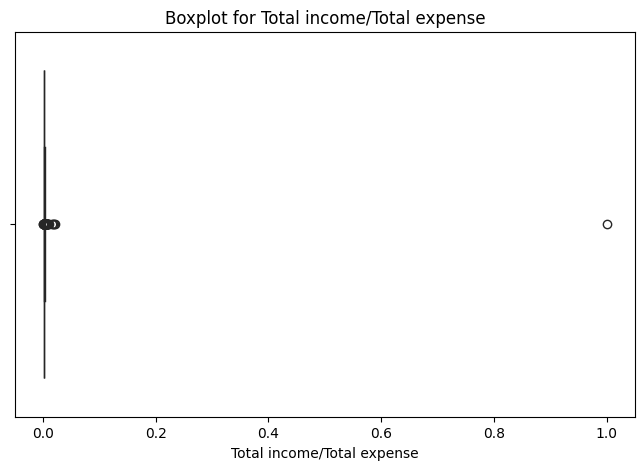

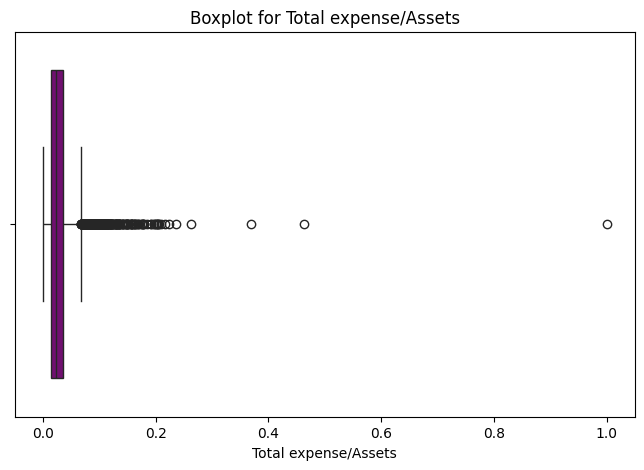

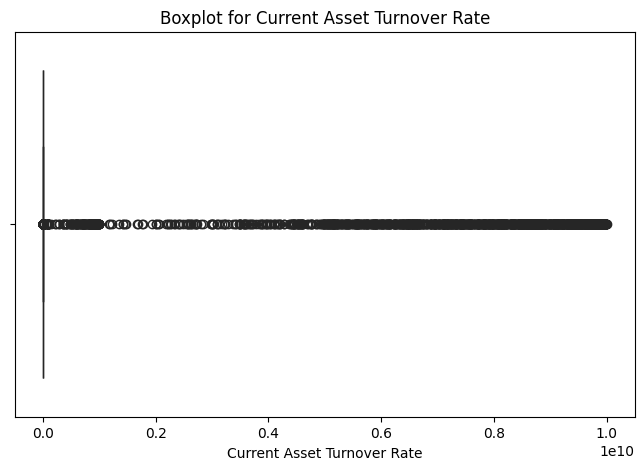

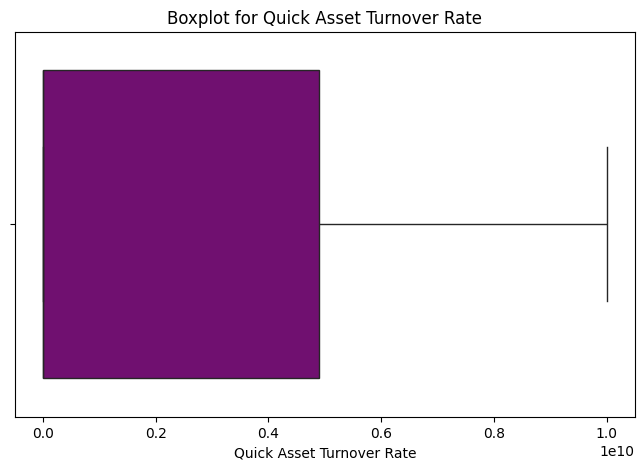

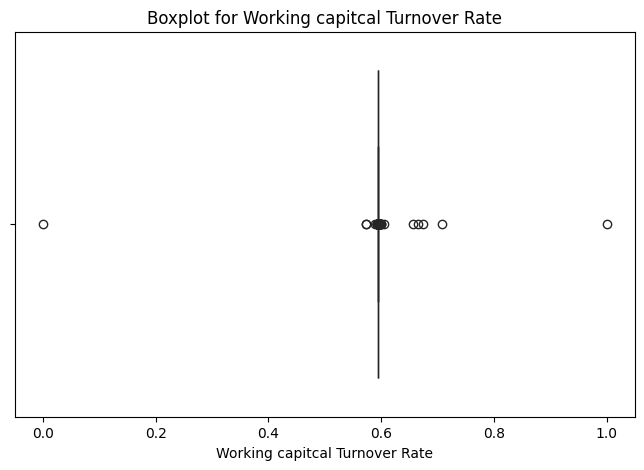

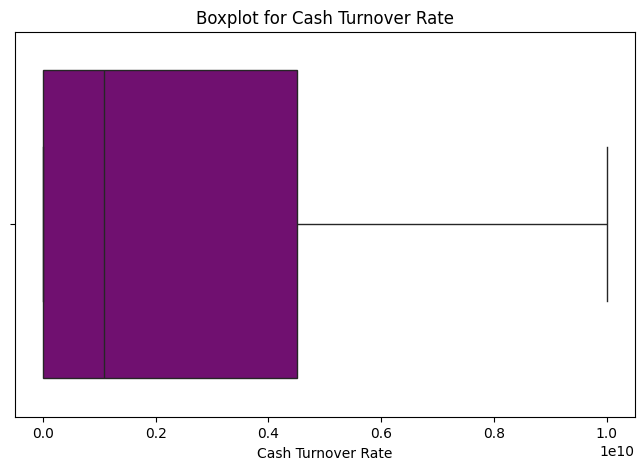

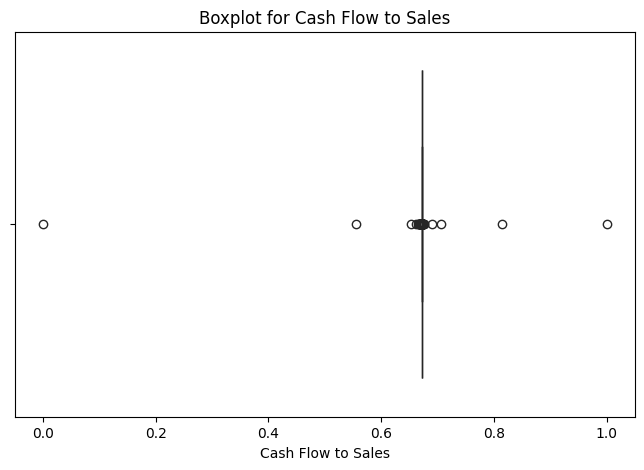

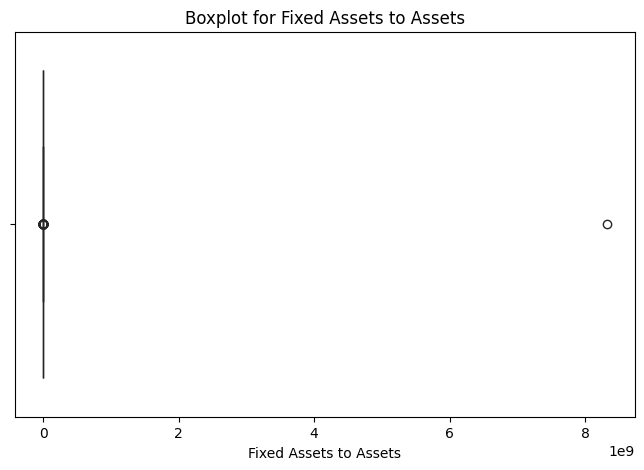

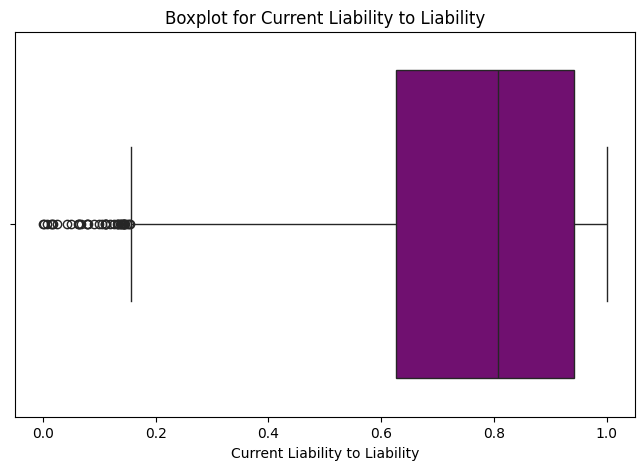

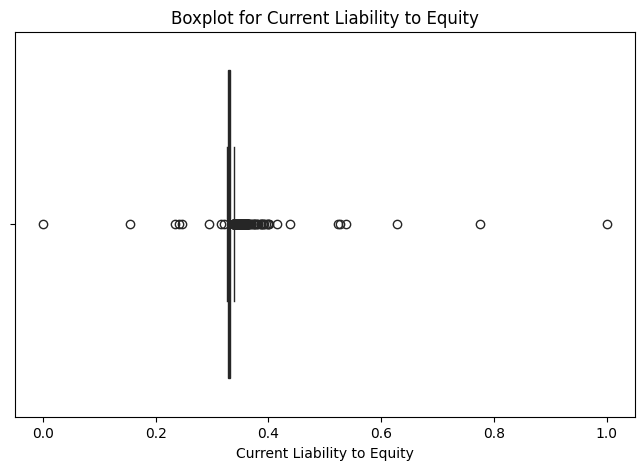

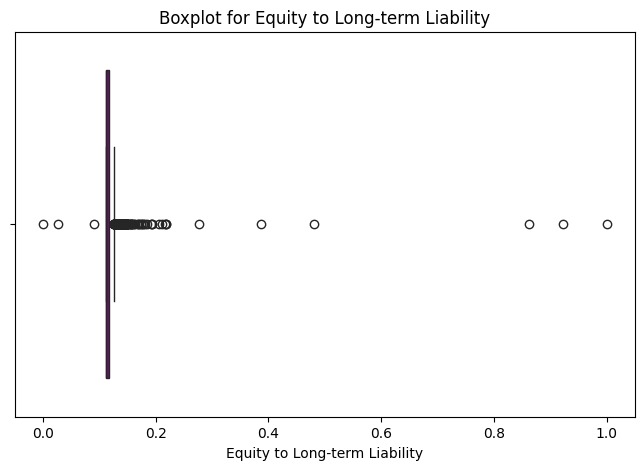

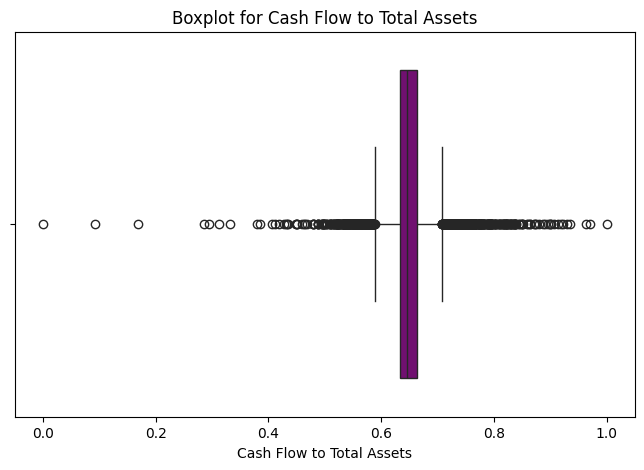

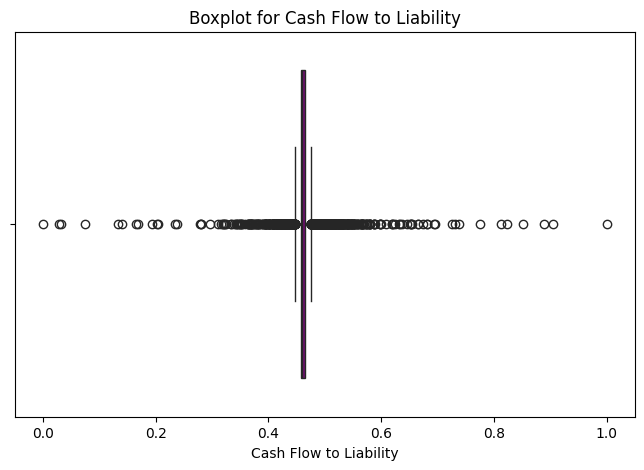

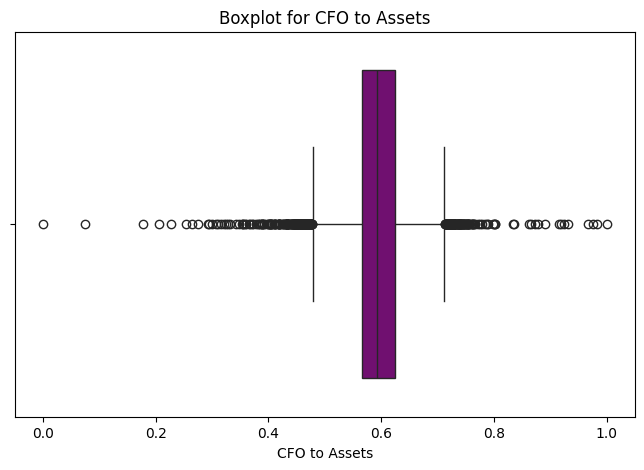

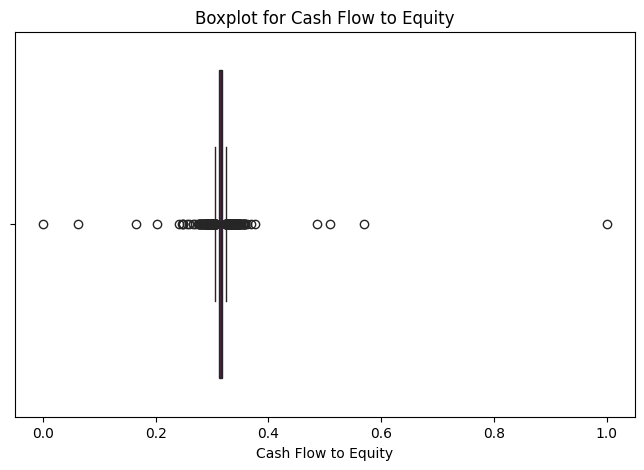

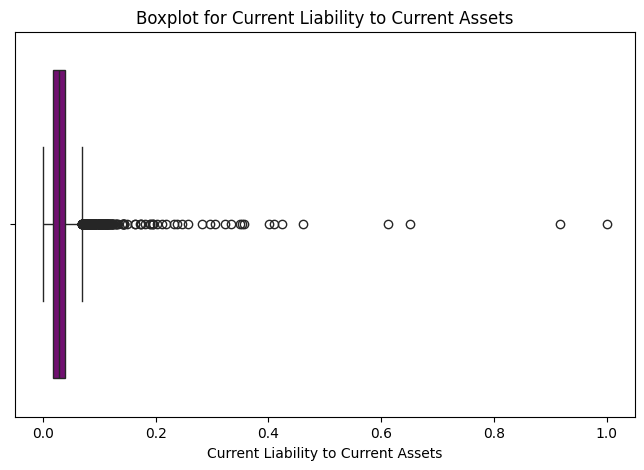

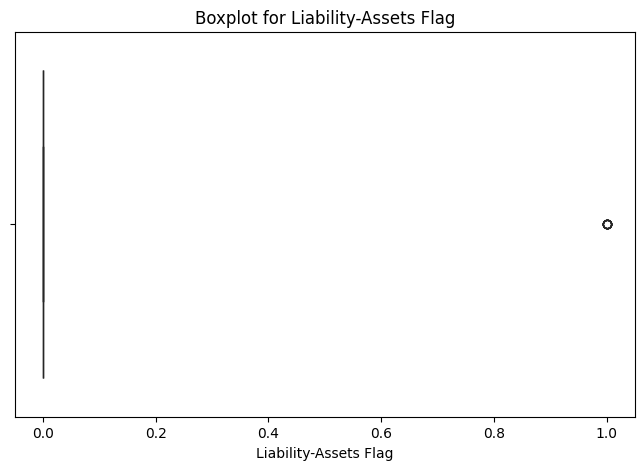

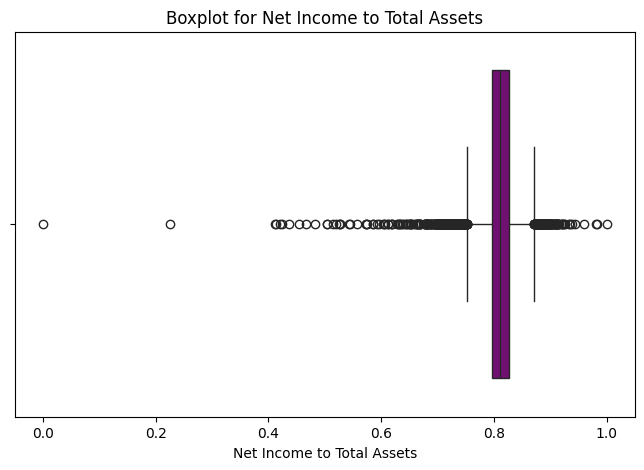

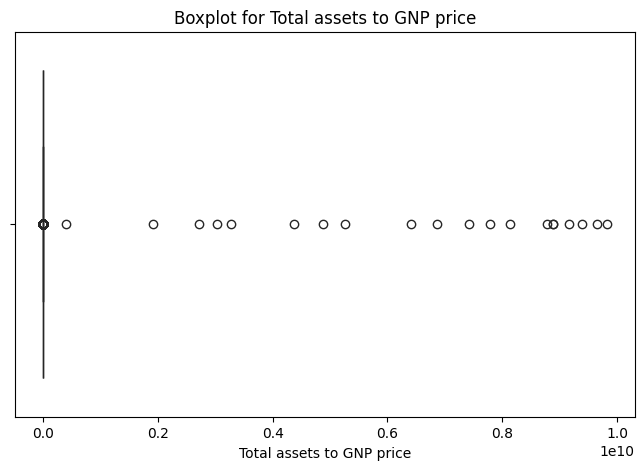

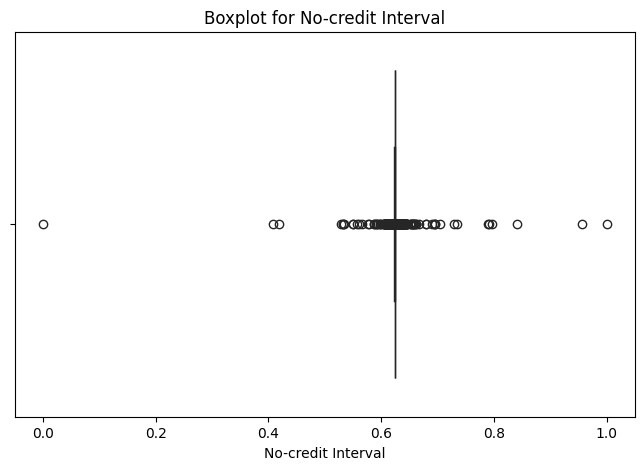

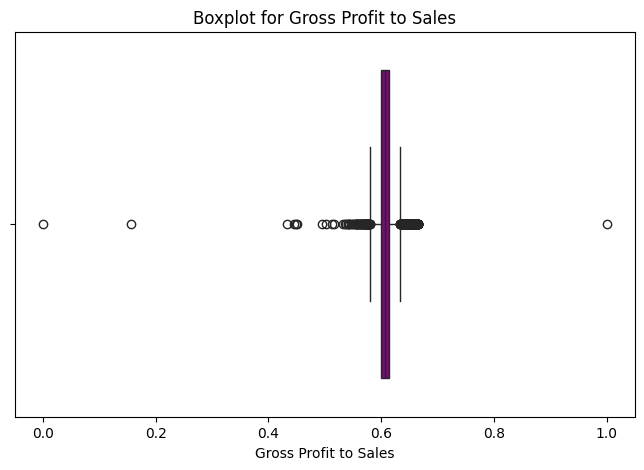

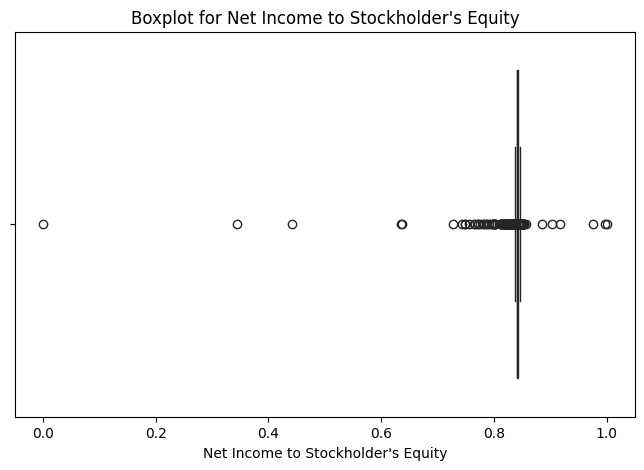

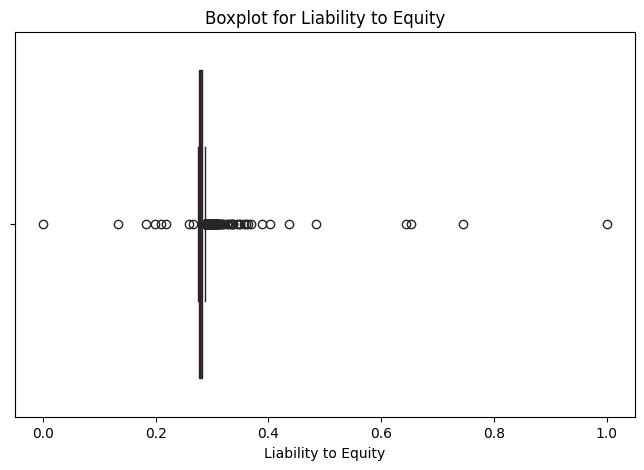

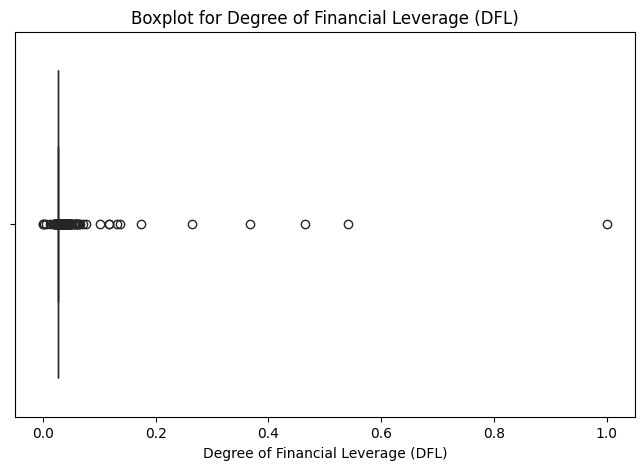

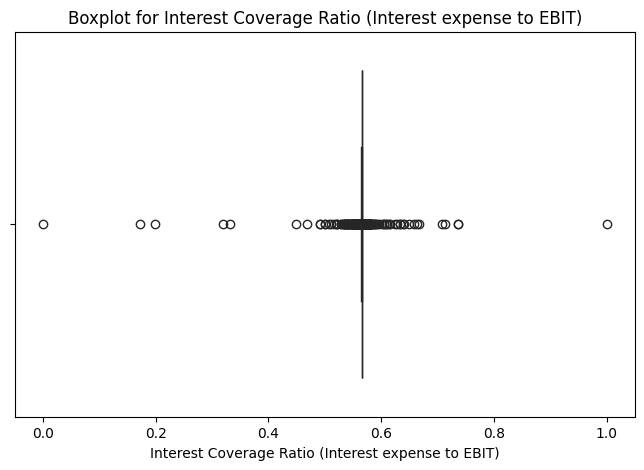

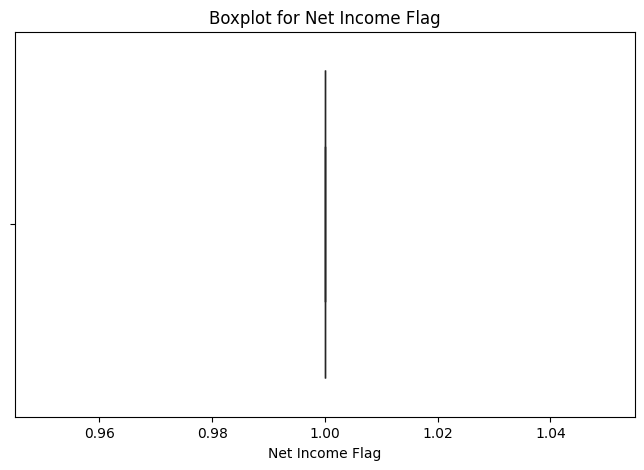

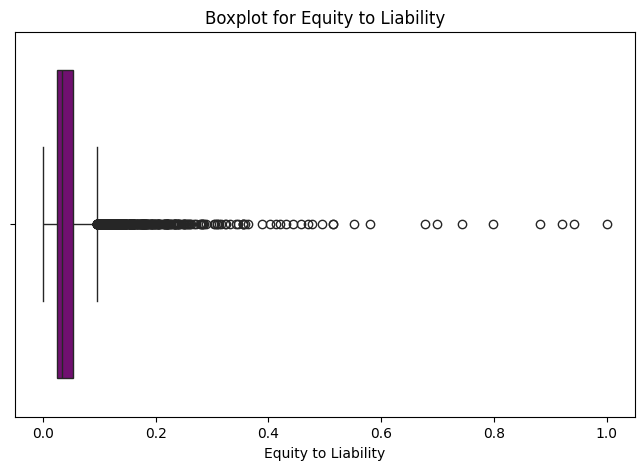

In [51]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color= 'purple')
    plt.title(f'Boxplot for {col}')
    plt.show()

- Based on Boxplot we can see that all most of the features `contains outliers`.

In [52]:
# detecting the rows with outliers in all numeric columns of a dataset using IQR.
def find_outliers_iqr(X):
    outlier_rows = []
    for col in df.select_dtypes(include=np.number).columns:  # Only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_rows.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return set(outlier_rows)
print("Rows with IQR Outliers:", find_outliers_iqr(df))

Rows with IQR Outliers: {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 23

- As we can see all the rows `contains outliers`, these columns could contain valuable information for predicting bankruptcy and we can't just proceed with it as well otherwise it will create problems with some algorithms and neither we can delete so instead of treating the outliers we can just brought it into the same range as others by applying `Min-Max Scaling`. 

In [53]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the scaled dataset
X.head()

ROA(C) before interest and depreciation before interest  \
0                                              0.371         
1                                              0.464         
2                                              0.426         
3                                              0.400         
4                                              0.465         

   ROA(A) before interest and % after tax  \
0                                   0.424   
1                                   0.538   
2                                   0.499   
3                                   0.451   
4                                   0.538   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                              0.406                   0.601   
1                                              0.517                   0.610   
2                                              0.472                   0.601   
3                                              0.458                   0.584   
4                                              0.522                   0.599   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                        0.601                  0.999   
1                        0.610                  0.999   
2                        0.601                  0.999   
3                        0.584                  0.999   
4                        0.599                  0.999   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                      0.797                        0.809   
1                      0.797                        0.809   
2                      0.796                        0.808   
3                      0.797                        0.809   
4                      0.797                        0.809   

   Non-industry income and expenditure/revenue  \
0                                        0.303   
1                                        0.304   
2                                        0.302   
3                                        0.303   
4                                        0.303   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                                 0.781                   0.000   
1                                 0.782                   0.000   
2                                 0.780                   0.000   
3                                 0.781                   0.000   
4                                 0.782                   0.790   

   Research and development expense rate  Cash flow rate  \
0                                  0.000           0.458   
1                                  0.000           0.462   
2                                  0.003           0.459   
3                                  0.000           0.466   
4                                  0.000           0.463   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                                0.000         0.000                    0.148   
1                                0.000         0.000                    0.182   
2                                0.000         0.000                    0.178   
3                                0.000         0.000                    0.154   
4                                0.000         0.000                    0.168   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                    0.148                    0.148   
1                    0.182                    0.182   
2                    0.178                    0.194   
3                    0.154                    0.154   
4                    0.168                    0.168   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                    0.169                0.312   
1                                    0.209                0.318   
2                                    0.181                0.307   
3                

In [54]:
# Verifying scaling

X.describe().loc[['min', 'max']]

ROA(C) before interest and depreciation before interest  \
min                                              0.000         
max                                              1.000         

     ROA(A) before interest and % after tax  \
min                                   0.000   
max                                   1.000   

     ROA(B) before interest and depreciation after tax  \
min                                              0.000   
max                                              1.000   

     Operating Gross Margin  Realized Sales Gross Margin  \
min                   0.000                        0.000   
max                   1.000                        1.000   

     Operating Profit Rate  Pre-tax net Interest Rate  \
min                  0.000                      0.000   
max                  1.000                      1.000   

     After-tax net Interest Rate  Non-industry income and expenditure/revenue  \
min                        0.000                                        0.000   
max                        1.000                                        1.000   

     Continuous interest rate (after tax)  Operating Expense Rate  \
min                                 0.000                   0.000   
max                                 1.000                   1.000   

     Research and development expense rate  Cash flow rate  \
min                                  0.000           0.000   
max                                  1.000           1.000   

     Interest-bearing debt interest rate  Tax rate (A)  \
min                                0.000         0.000   
max                                1.000         1.000   

     Net Value Per Share (B)  Net Value Per Share (A)  \
min                    0.000                    0.000   
max                    1.000                    1.000   

     Net Value Per Share (C)  Persistent EPS in the Last Four Seasons  \
min                    0.000                                    0.000   
max                    1.000                                    1.000   

     Cash Flow Per Share  Revenue Per Share (Yuan ¥)  \
min                0.000                       0.000   
max                1.000                       1.000   

     Operating Profit Per Share (Yuan ¥)  \
min                                0.000   
max                                1.000   

     Per Share Net profit before tax (Yuan ¥)  \
min                                     0.000   
max                                     1.000   

     Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
min                                    0.000                         0.000   
max                                    1.000                         1.000   

     After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
min                             0.000                           0.000   
max                             1.000                           1.000   

     Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
min                              0.000                    0.000   
max                              1.000                    1.000   

     Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
min                  0.000                                 0.000   
max                  1.000                                 1.000   

     Cash Reinvestment %  Current Ratio  Quick Ratio  Interest Expense Ratio  \
min                0.000          0.000        0.000                   0.000   
max                1.000          1.000        1.000                   1.000   

     Total debt/Total net worth  Debt ratio %  Net worth/Assets  \
min                       0.000         0.000             0.000   
max                       1.000         1.000             1.000   

     Long-term fund suitability ratio (A)  Borrowing dependency  \
min                                 0.000                 0.000   
max                                 1.000      

- Now the data is scaled we can proceed further with the data.

# 2. Feature engineering data according to the business requirements

In [55]:
# Identify single-value columns
single_value_cols = [col for col in X.columns if X[col].nunique() == 1]
single_value_cols

X = X.drop(columns = single_value_cols)
X.shape

(6819, 94)

- We removed `single-value columns` during preprocessing because they do not provide any useful information for the machine learning model. Now we have `94 features`.

In [56]:
X

ROA(C) before interest and depreciation before interest  \
0                                                 0.371         
1                                                 0.464         
2                                                 0.426         
3                                                 0.400         
4                                                 0.465         
...                                                 ...         
6814                                              0.494         
6815                                              0.475         
6816                                              0.473         
6817                                              0.506         
6818                                              0.493         

      ROA(A) before interest and % after tax  \
0                                      0.424   
1                                      0.538   
2                                      0.499   
3                                      0.451   
4                                      0.538   
...                                      ...   
6814                                   0.539   
6815                                   0.538   
6816                                   0.534   
6817                                   0.560   
6818                                   0.570   

      ROA(B) before interest and depreciation after tax  \
0                                                 0.406   
1                                                 0.517   
2                                                 0.472   
3                                                 0.458   
4                                                 0.522   
...                                                 ...   
6814                                              0.543   
6815                                              0.524   
6816                                              0.521   
6817                                              0.554   
6818                                              0.550   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                      0.601                        0.601   
1                      0.610                        0.610   
2                      0.601                        0.601   
3                      0.584                        0.584   
4                      0.599                        0.599   
...                      ...                          ...   
6814                   0.604                        0.604   
6815                   0.598                        0.598   
6816                   0.610                        0.610   
6817                   0.608                        0.608   
6818                   0.627                        0.627   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                     0.999                      0.797   
1                     0.999                      0.797   
2                     0.999                      0.796   
3                     0.999                      0.797   
4                     0.999                      0.797   
...                     ...                        ...   
6814                  0.999                      0.797   
6815                  0.999                      0.797   
6816                  0.999                      0.797   
6817                  0.999                      0.797   
6818                  0.998                      0.802   

      After-tax net Interest Rate  \
0                           0.809   
1                           0.809   
2                           0.808   
3                           0.809   
4                           0.809   
...                           ...   
6814                        0.809   
6815                        0.809   
6816                        0.809   
6817                        0.809   
6818                        0.814   

      Non-industry income and expenditure/revenue  \
0          

### Identifying Correlated Featuresvia Heatmap

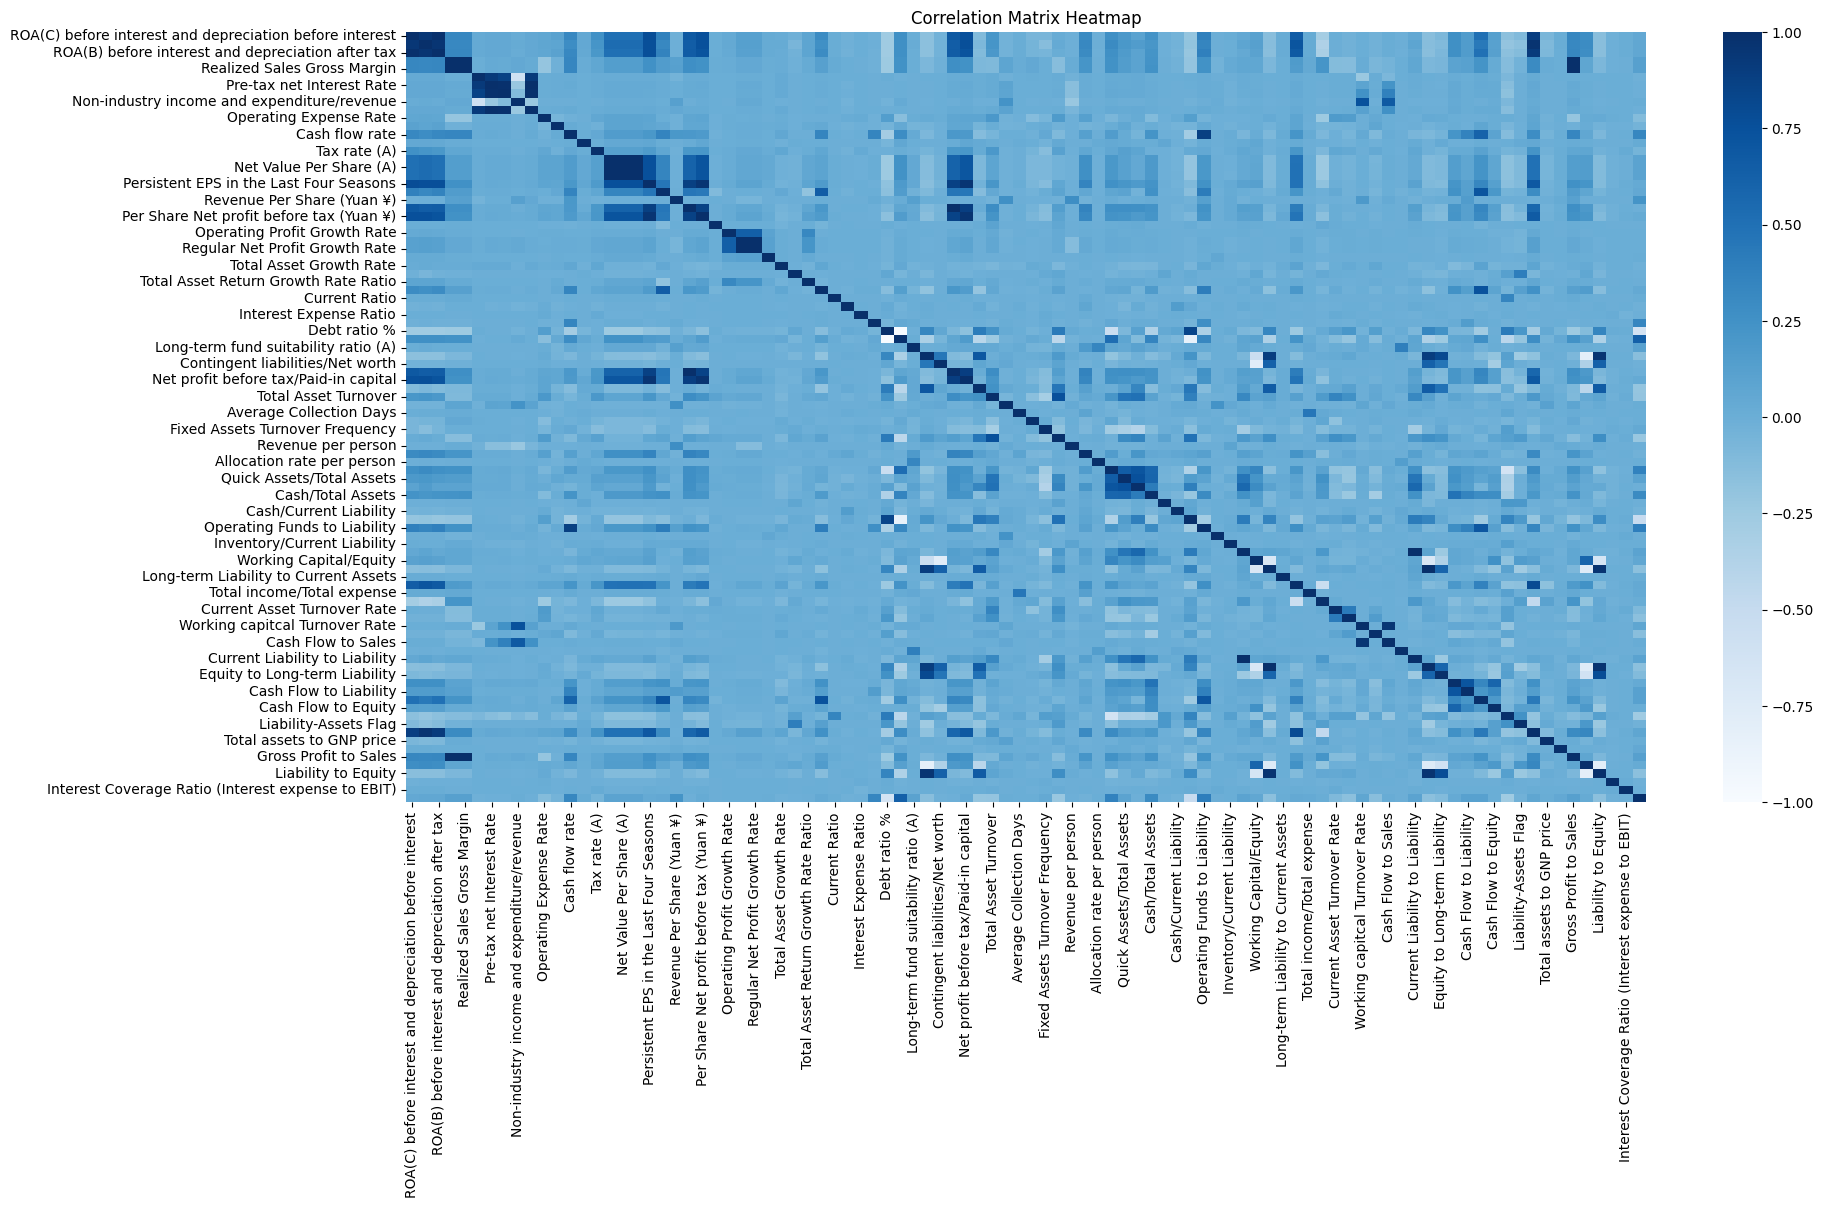

In [57]:
correlation_matrix = X.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix, cmap='Blues')
plt.title("Correlation Matrix Heatmap")
plt.show()

- We can see `multicollinearity` in the data so let's calculate `Variance Inflation Factor (VIF)` for each feature to measure multicollinearity and drop features with a `high VIF (e.g., >10)`.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
X = X.drop(vif[vif["VIF"] > 10]["Feature"], axis=1)

### Heatmap after the removal of highly correlated features

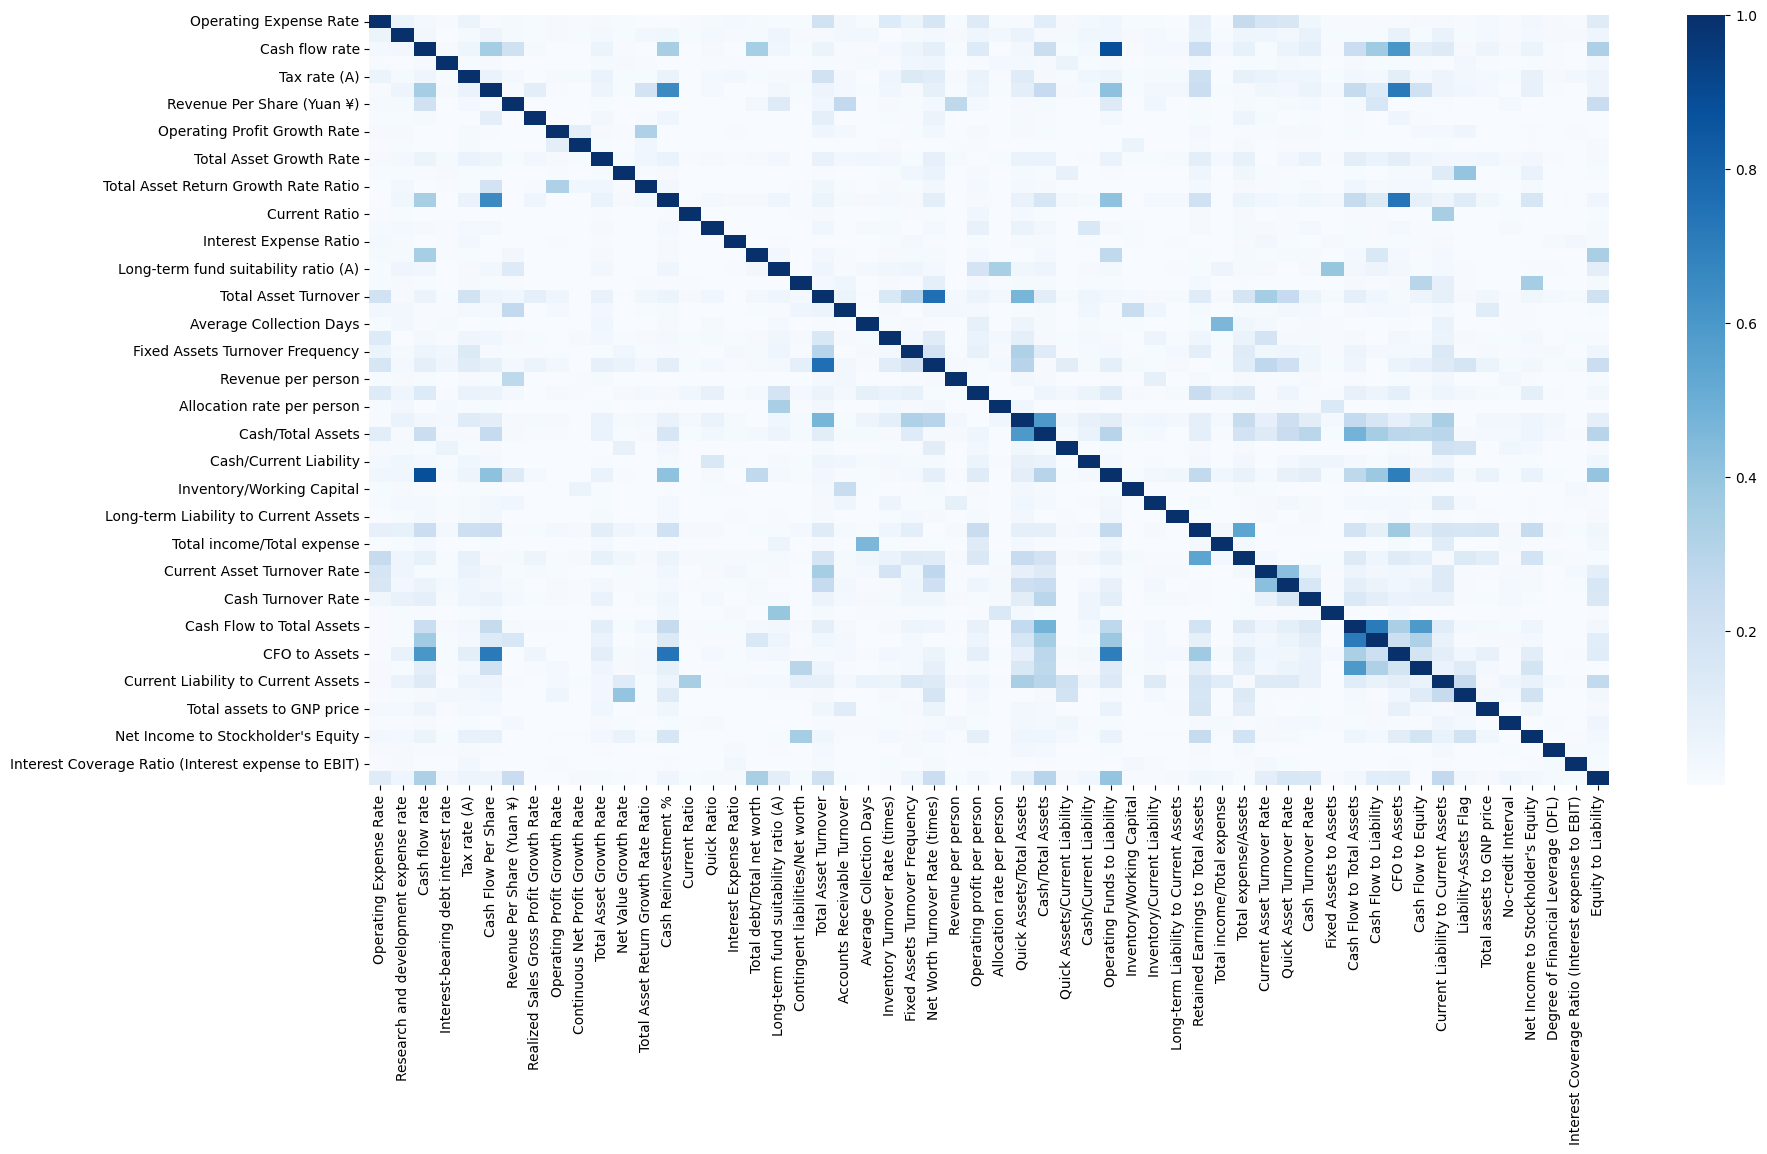

In [59]:
# heatmap
plt.figure(figsize=(20,10))
correlation = X.corr()
sns.heatmap(abs(correlation),  cmap='Blues');

In [60]:
X.shape

(6819, 56)

- originally we had `94 features` in our data, But after removing the highly correlated features we have left with `57 features` only.

# 3. Model and Evaluate various strategies that will be used to find actionable insights.

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 3)

### Dictionary of algorithms to test

In [63]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

### Evaluating each model

In [64]:
results = {}
for model_name, model in models.items():
    print(f"Training and testing {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Test the model
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')  # Weighted for multi-class
    f1 = f1_score(y_test, predictions, average='weighted')  # Weighted for multi-class
    cross_val = cross_val_score(model, X, y, cv=5).mean()  # Cross-validation score
    
    # Store results
    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "F1-Score": f1, "Cross-Val Accuracy": cross_val,}

Training and testing Logistic Regression...
Training and testing Random Forest...
Training and testing Support Vector Machine...
Training and testing Decision Tree...
Training and testing K-Nearest Neighbors...
Training and testing Naive Bayes...


### Displaying result

In [65]:
# Display results
print("\nModel Performance:")
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {scores['Accuracy']:.2f}")
    print(f"  Precision: {scores['Precision']:.2f}")
    print(f"  F1-Score: {scores['F1-Score']:.2f}")
    print(f"  Cross-Val Accuracy: {scores['Cross-Val Accuracy']:.2f}\n")


Model Performance:
Logistic Regression:
  Accuracy: 0.97
  Precision: 0.94
  F1-Score: 0.96
  Cross-Val Accuracy: 0.97

Random Forest:
  Accuracy: 0.97
  Precision: 0.96
  F1-Score: 0.96
  Cross-Val Accuracy: 0.97

Support Vector Machine:
  Accuracy: 0.97
  Precision: 0.94
  F1-Score: 0.96
  Cross-Val Accuracy: 0.97

Decision Tree:
  Accuracy: 0.96
  Precision: 0.96
  F1-Score: 0.96
  Cross-Val Accuracy: 0.94

K-Nearest Neighbors:
  Accuracy: 0.97
  Precision: 0.94
  F1-Score: 0.96
  Cross-Val Accuracy: 0.96

Naive Bayes:
  Accuracy: 0.55
  Precision: 0.96
  F1-Score: 0.68
  Cross-Val Accuracy: 0.47



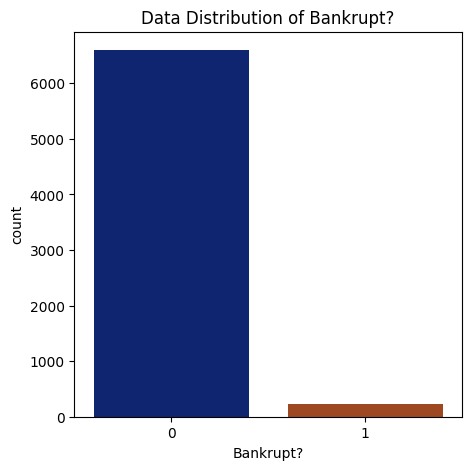

In [66]:
y.value_counts()

plt.figure(figsize=(5,5))
sns.countplot(x=y, palette="dark")
plt.title("Data Distribution of Bankrupt?")
plt.show()

- It seems that my data is `Imbalanced`, which might be causing high accuracy due to the `majority class` dominating the predictions. So, let's apply `SMOTE` to balance the dataset.

In [67]:
smote = SMOTE(random_state = 3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution before SMOTE: Bankrupt?
0    5274
1     181
Name: count, dtype: int64
Class distribution after SMOTE: Bankrupt?
0    5274
1    5274
Name: count, dtype: int64


- Now my data distribution is `balanced`.

In [68]:
results = {}
for model_name, model in models.items():
    print(f"Training and testing {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    predictions = model.predict(X_test)  # Test the model
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')  # Weighted for multi-class
    f1 = f1_score(y_test, predictions, average='weighted')  # Weighted for multi-class
    cross_val = cross_val_score(model, X, y, cv=5).mean()  # Cross-validation score
    
    # Store results
    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "F1-Score": f1, "Cross-Val Accuracy": cross_val,}

Training and testing Logistic Regression...
Training and testing Random Forest...
Training and testing Support Vector Machine...
Training and testing Decision Tree...
Training and testing K-Nearest Neighbors...
Training and testing Naive Bayes...


In [69]:
# Display results
print("\nModel Performance:")
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {scores['Accuracy']:.2f}")
    print(f"  Precision: {scores['Precision']:.2f}")
    print(f"  F1-Score: {scores['F1-Score']:.2f}")
    print(f"  Cross-Val Accuracy: {scores['Cross-Val Accuracy']:.2f}\n")


Model Performance:
Logistic Regression:
  Accuracy: 0.85
  Precision: 0.97
  F1-Score: 0.89
  Cross-Val Accuracy: 0.97

Random Forest:
  Accuracy: 0.96
  Precision: 0.97
  F1-Score: 0.97
  Cross-Val Accuracy: 0.97

Support Vector Machine:
  Accuracy: 0.87
  Precision: 0.97
  F1-Score: 0.91
  Cross-Val Accuracy: 0.97

Decision Tree:
  Accuracy: 0.94
  Precision: 0.96
  F1-Score: 0.95
  Cross-Val Accuracy: 0.94

K-Nearest Neighbors:
  Accuracy: 0.85
  Precision: 0.96
  F1-Score: 0.89
  Cross-Val Accuracy: 0.96

Naive Bayes:
  Accuracy: 0.36
  Precision: 0.96
  F1-Score: 0.50
  Cross-Val Accuracy: 0.47



- Let's go with the `Random Forest` model because it gives good results `(96% accuracy, 97% precision, and 97% F1-score)`.